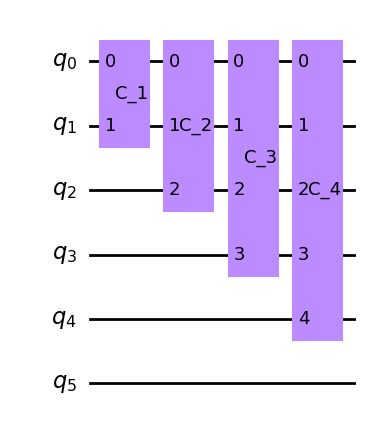

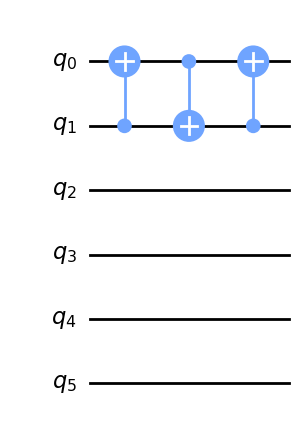

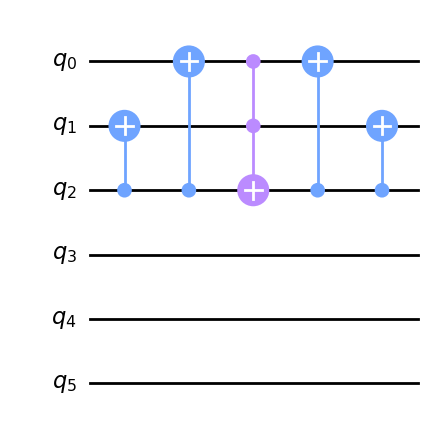

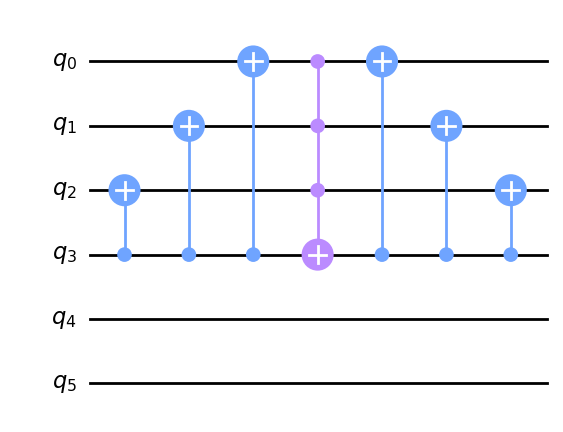

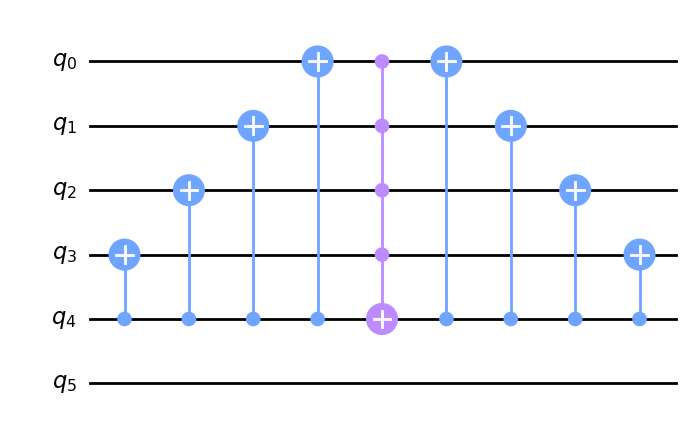

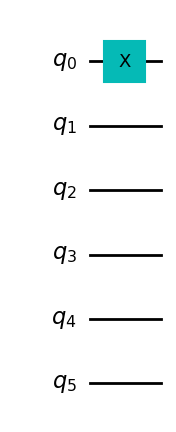

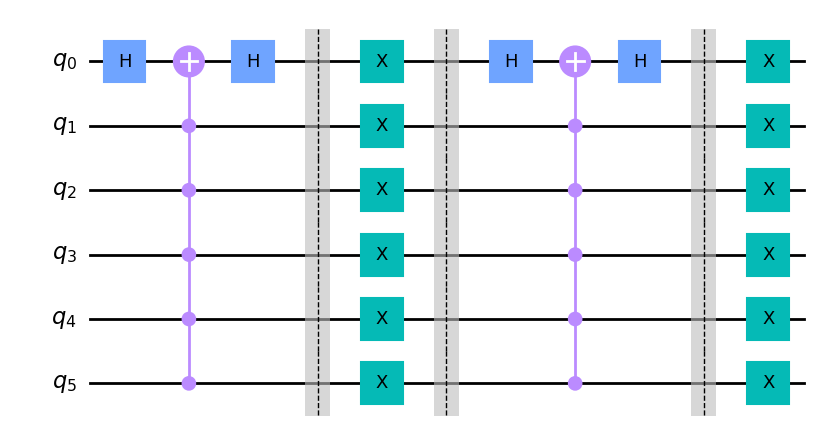

In [1]:
import qiskit
from qiskit import QuantumCircuit
Cgates = [qiskit.QuantumCircuit(x+2, name=r'C_' + str(x+1)).to_gate() for x in range(4)]

circ = QuantumCircuit(6)
for ind in range(4):
    circ.append(Cgates[ind], [x for x in range(ind+2)])

display(circ.draw('mpl'))

def CI_noc(i):
    global circ
    for j in range(i):
        circ.mcx([i], i-1-j, mode="noancilla")
    circ.mcx([x for x in range(i)], i, mode="noancilla")
    for j in range(i):
        circ.mcx([i], j, mode="noancilla")


circ = QuantumCircuit(6)
CI_noc(1)
display(circ.draw('mpl'))

circ = QuantumCircuit(6)
CI_noc(2)
display(circ.draw('mpl'))


circ = QuantumCircuit(6)
CI_noc(3)
display(circ.draw('mpl'))

circ = QuantumCircuit(6)
CI_noc(4)
display(circ.draw('mpl'))

circ = QuantumCircuit(6)
circ.x(0)
display(circ.draw('mpl'))


circ = QuantumCircuit(6)
circ.h(0)
circ.mcx([x for x in range(1, 6)], 0)
circ.h(0)
circ.barrier()

for i in range(6):
    circ.x(i)

circ.barrier()

circ.h(0)
circ.mcx([x for x in range(1, 6)], 0)
circ.h(0)
circ.barrier()

for i in range(6):
    circ.x(i)
display(circ.draw('mpl'))


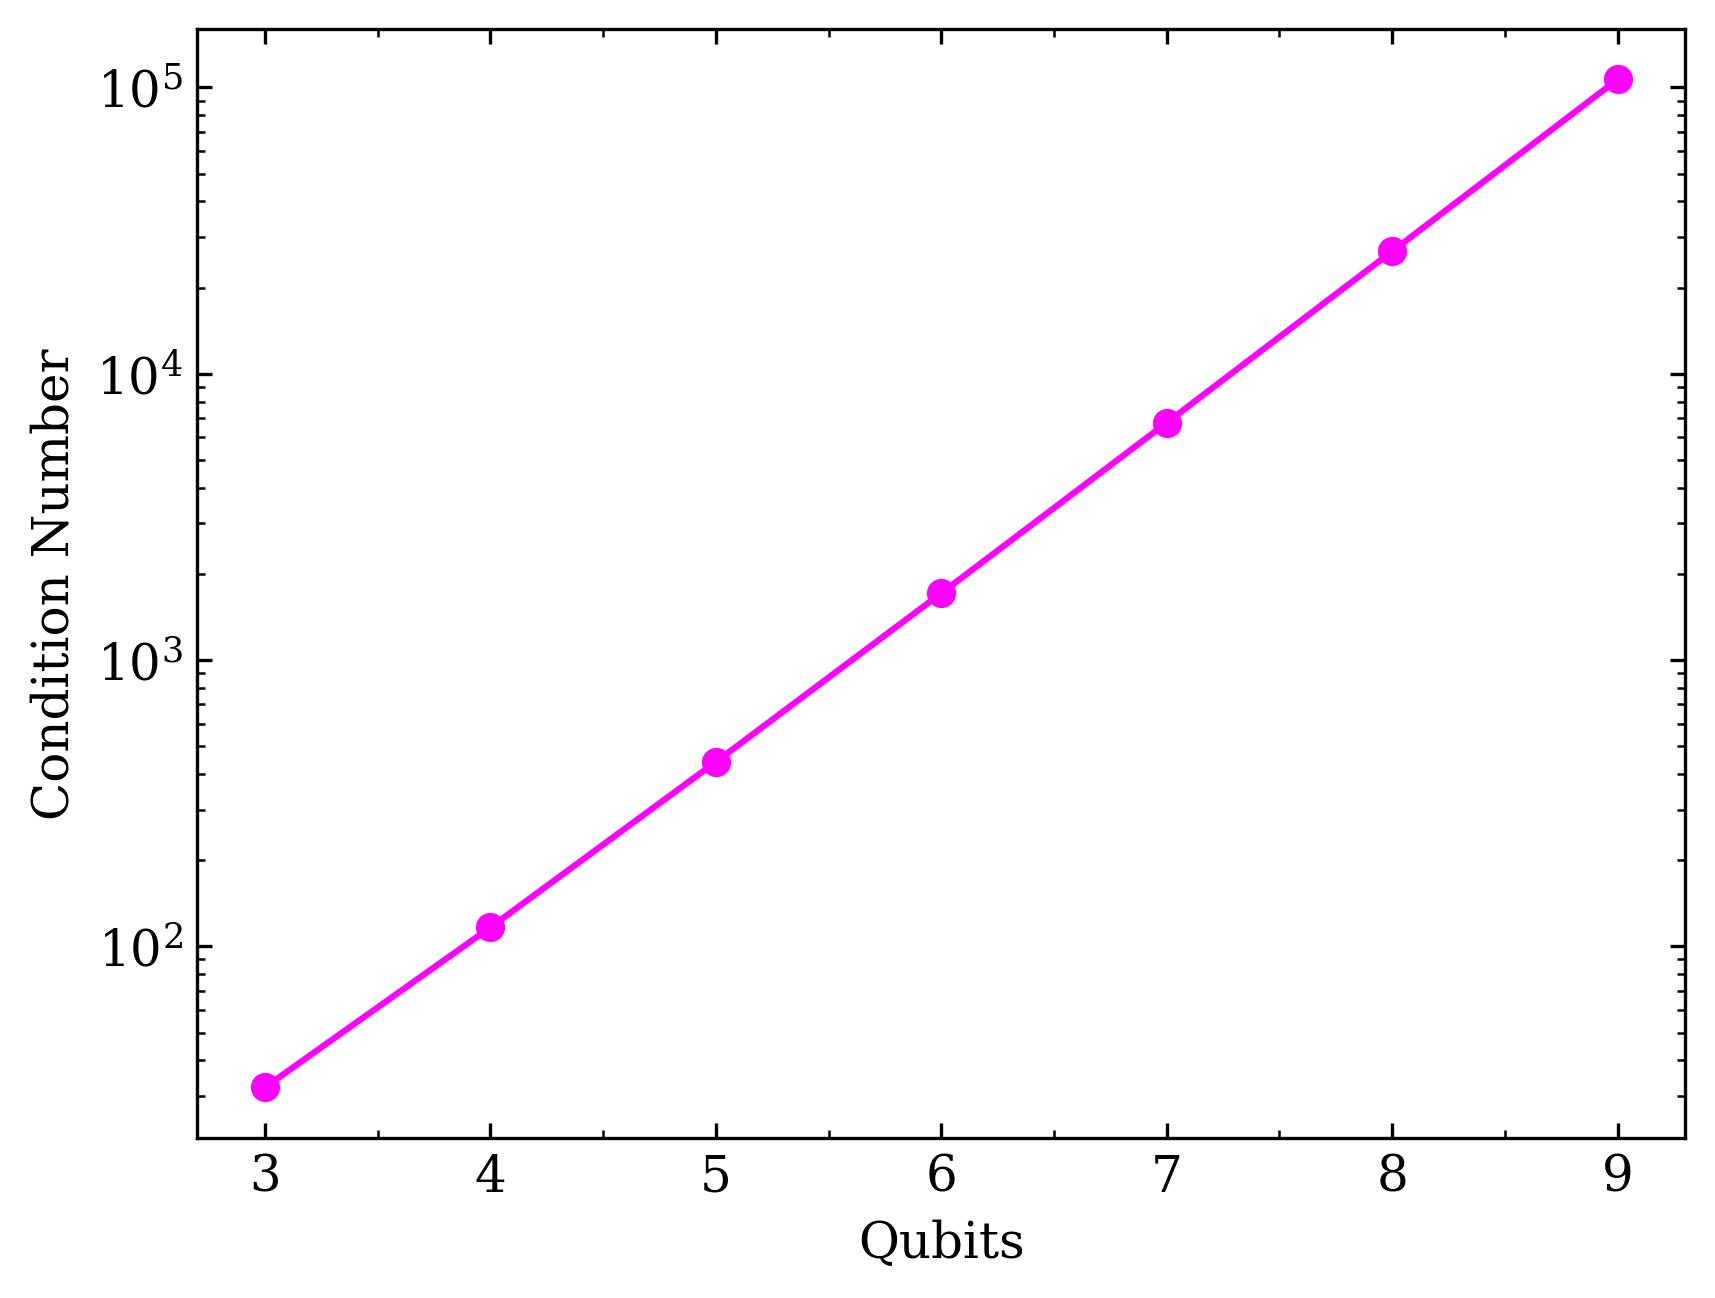

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
#%pip install openpyxl
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker

file = pd.read_excel("numerical_sims_res.xlsx")
gea = "GEA"
ta = "HEA"
default_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
m = "magenta"
b = "black"
bl = "blue"
font = {'family' : 'serif', 'weight' : 'normal', 'size' : 12}


def ticks_show():
    plt.tick_params(which='both', direction='in', bottom=True, top=True, left=True, right=True)
    plt.minorticks_on()
    #plt.legend(edgecolor='black', fancybox=False)
    plt.gca().xaxis.set_minor_locator(ticker.MultipleLocator(0.5))
    plt.rc('font', **font)
    mpl.rcParams['figure.dpi'] = 300

# Condition number vs. Qubits
plt.figure()
plt.semilogy(file.iloc[1:9, 0], file.iloc[1:9, 10], "-o", color=m)
plt.xlabel("Qubits")
plt.ylabel("Condition Number")
ticks_show()
plt.savefig("all_images/cond_vs_qubits.pdf")


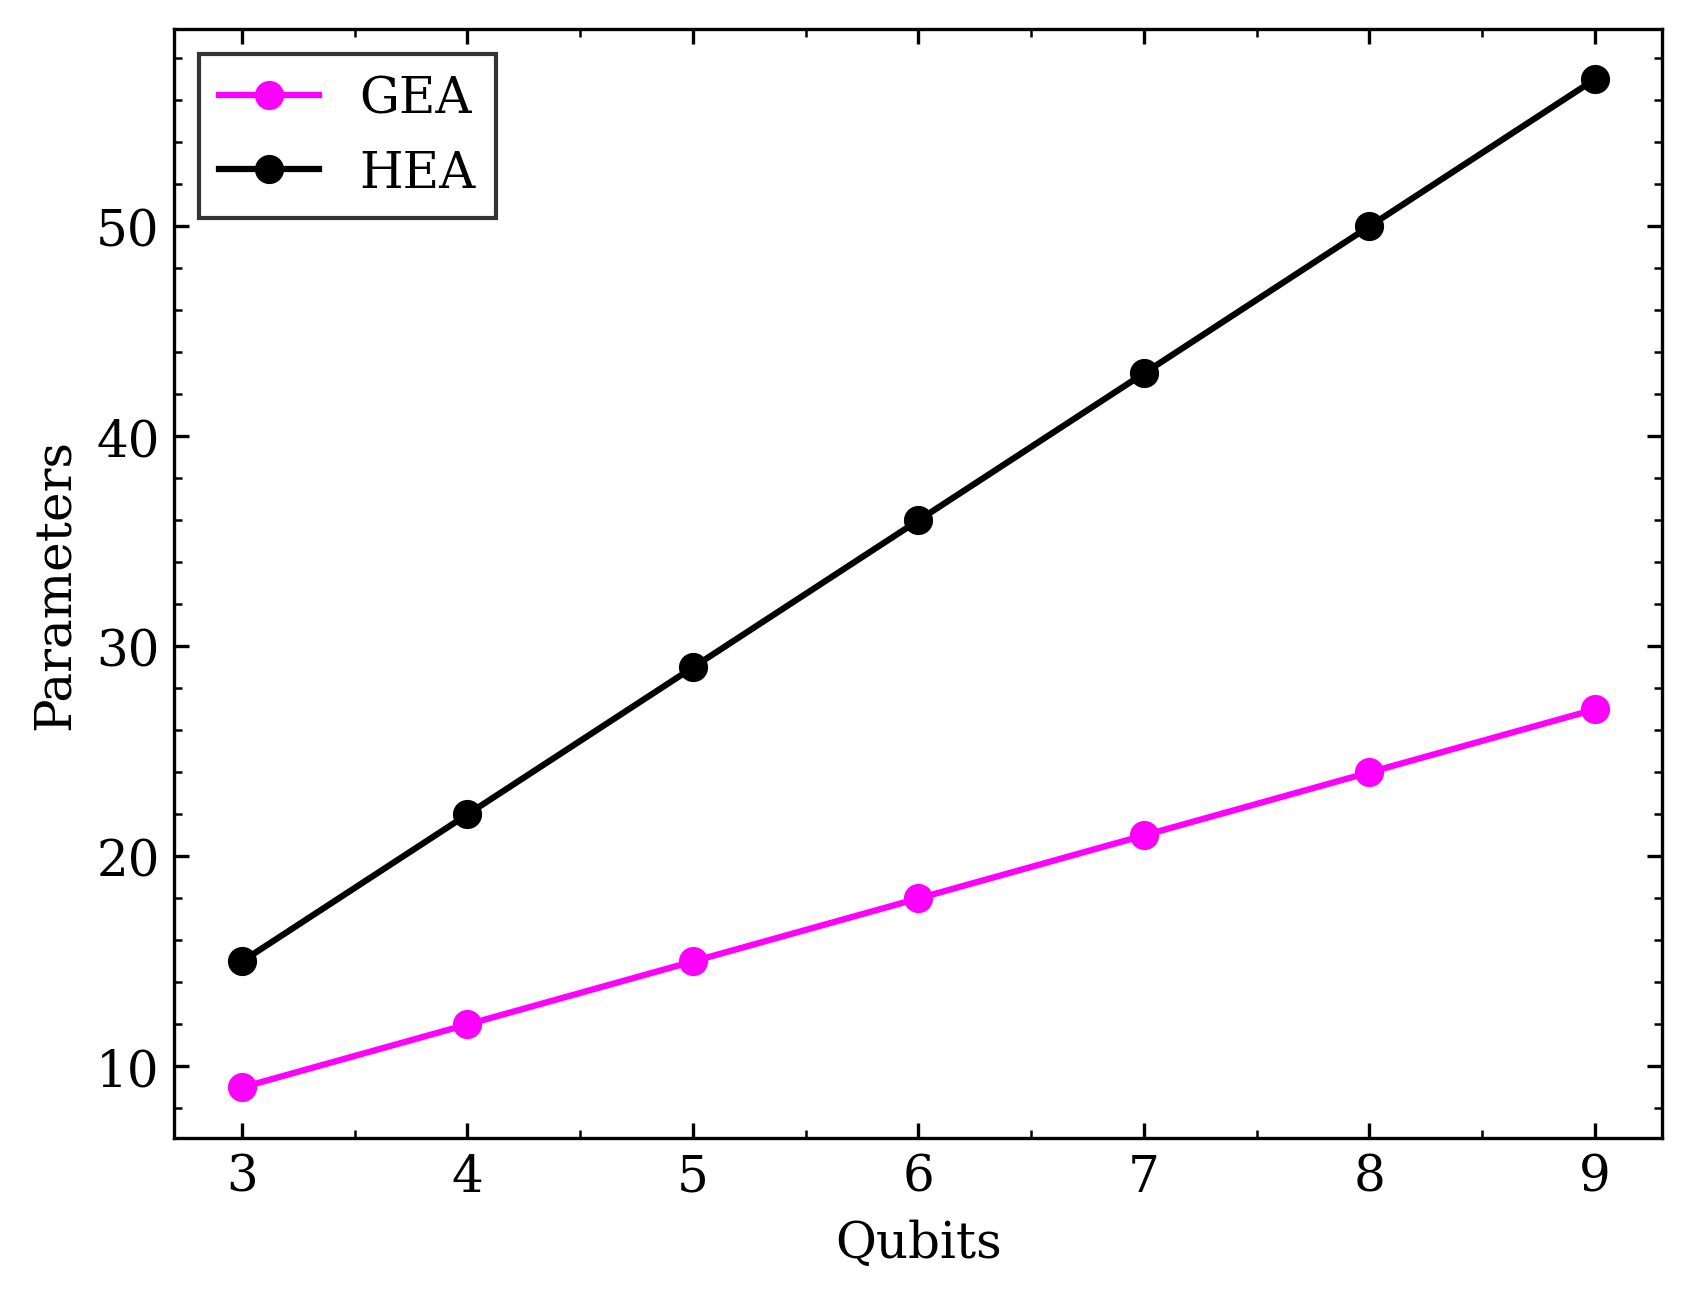

In [187]:
# Parameters vs. Qubits
plt.figure()
plt.plot(file.iloc[1:9, 0], file.iloc[1:9, 13], "-o", label=gea, color=m)
plt.plot(file.iloc[1:9, 0], file.iloc[1:9, 14], "-o", label=ta, color=b)
plt.xlabel("Qubits")
plt.ylabel("Parameters")
ticks_show()
plt.savefig("all_images/params_vs_qubits.pdf")


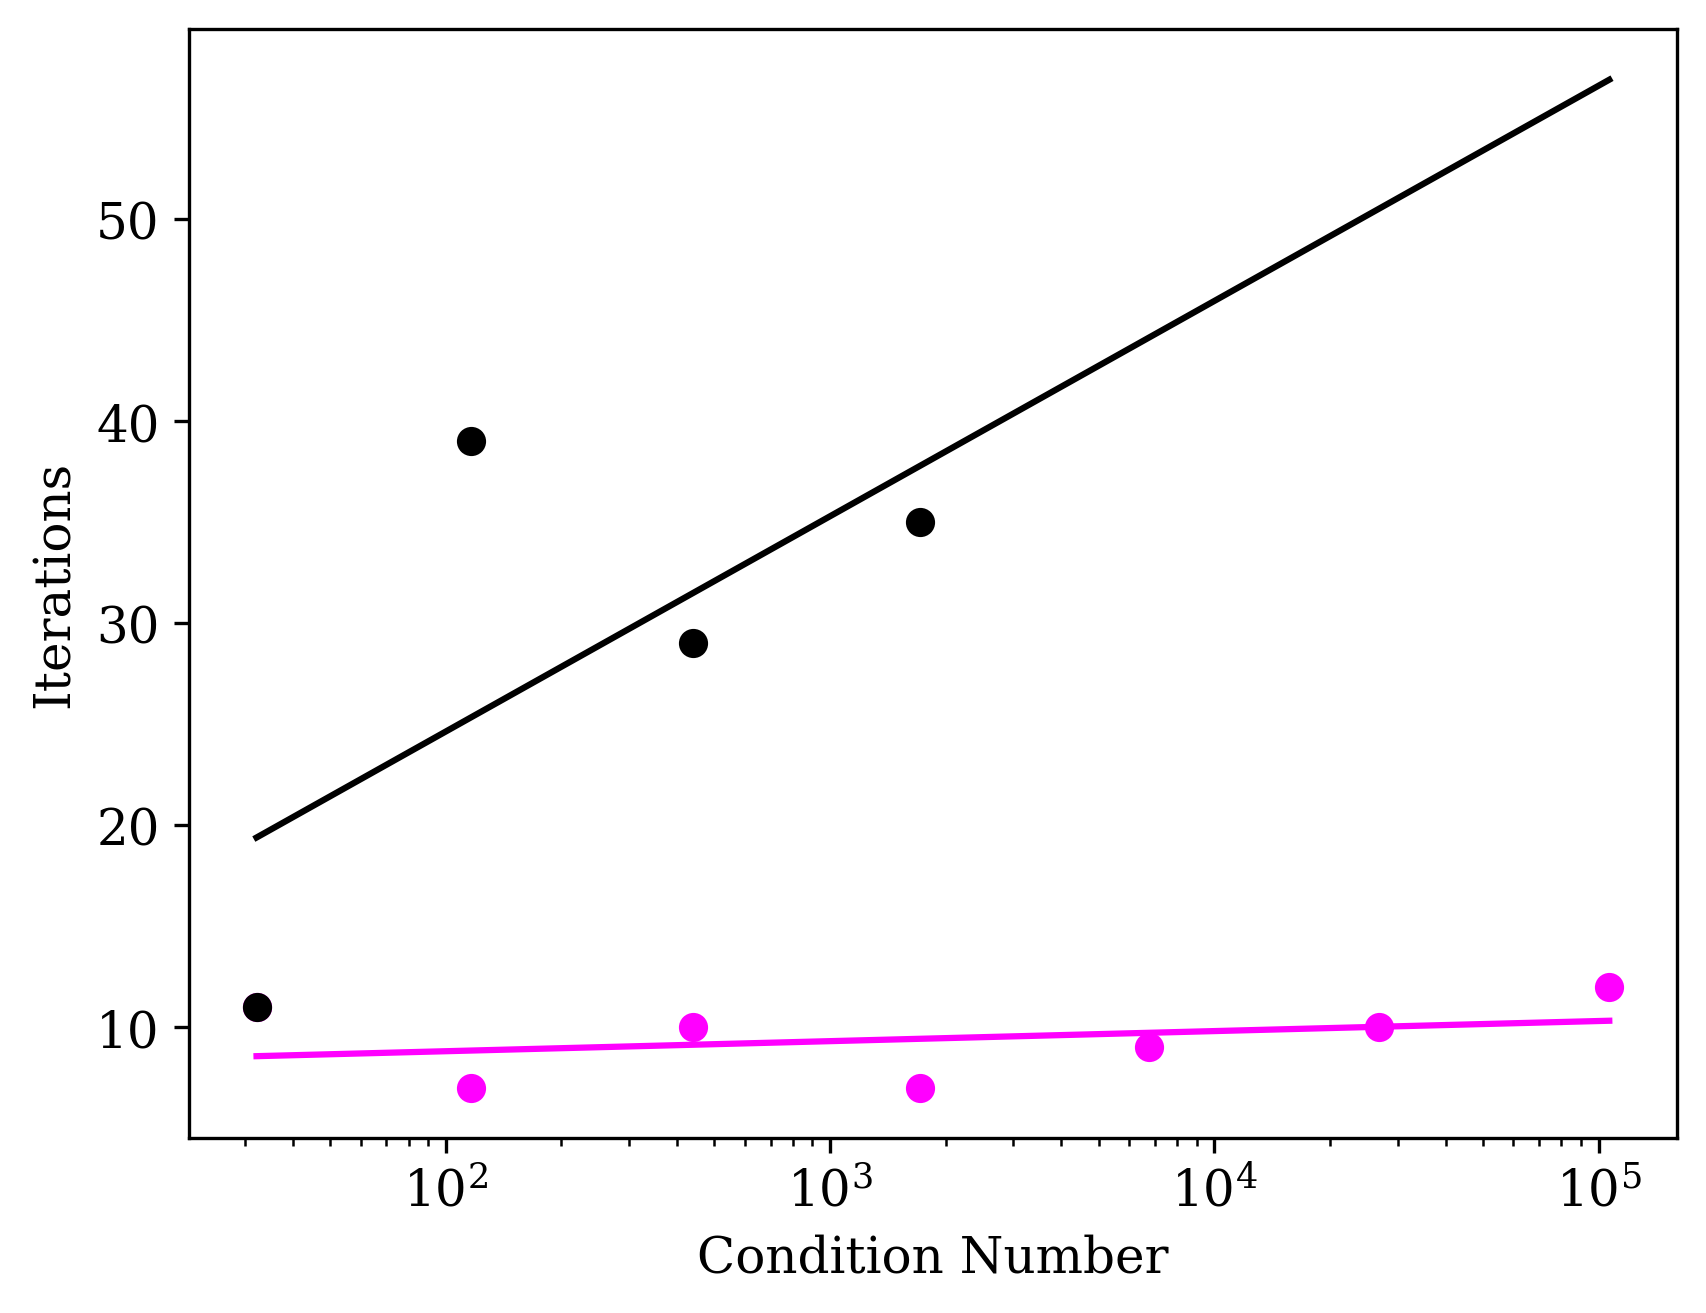

In [188]:

## ITERATIONS WRT CONDITION NUMBER (NOT SUPER IMPORTANT)
plt.figure()
conds = list(file.iloc[1:8, 10])
logconds = [np.log10(x) for x in conds]

y = list(file.iloc[11:18, 2].array)
plt.semilogx(conds, y, "o", color=m, label=gea)
plt.semilogx(np.unique(conds), np.poly1d(np.polyfit(logconds, y, 1))(np.unique(logconds)), color=m)

y = list(file.iloc[11:15, 6].array)
plt.semilogx(conds[:4], y, "o", color=b, label=ta)
plt.semilogx(np.unique(conds), np.poly1d(np.polyfit(logconds[:4], y, 1))(np.unique(logconds)), color=b, label="HEA - Predicted")
plt.xlabel("Condition Number")
plt.ylabel("Iterations")
plt.show()


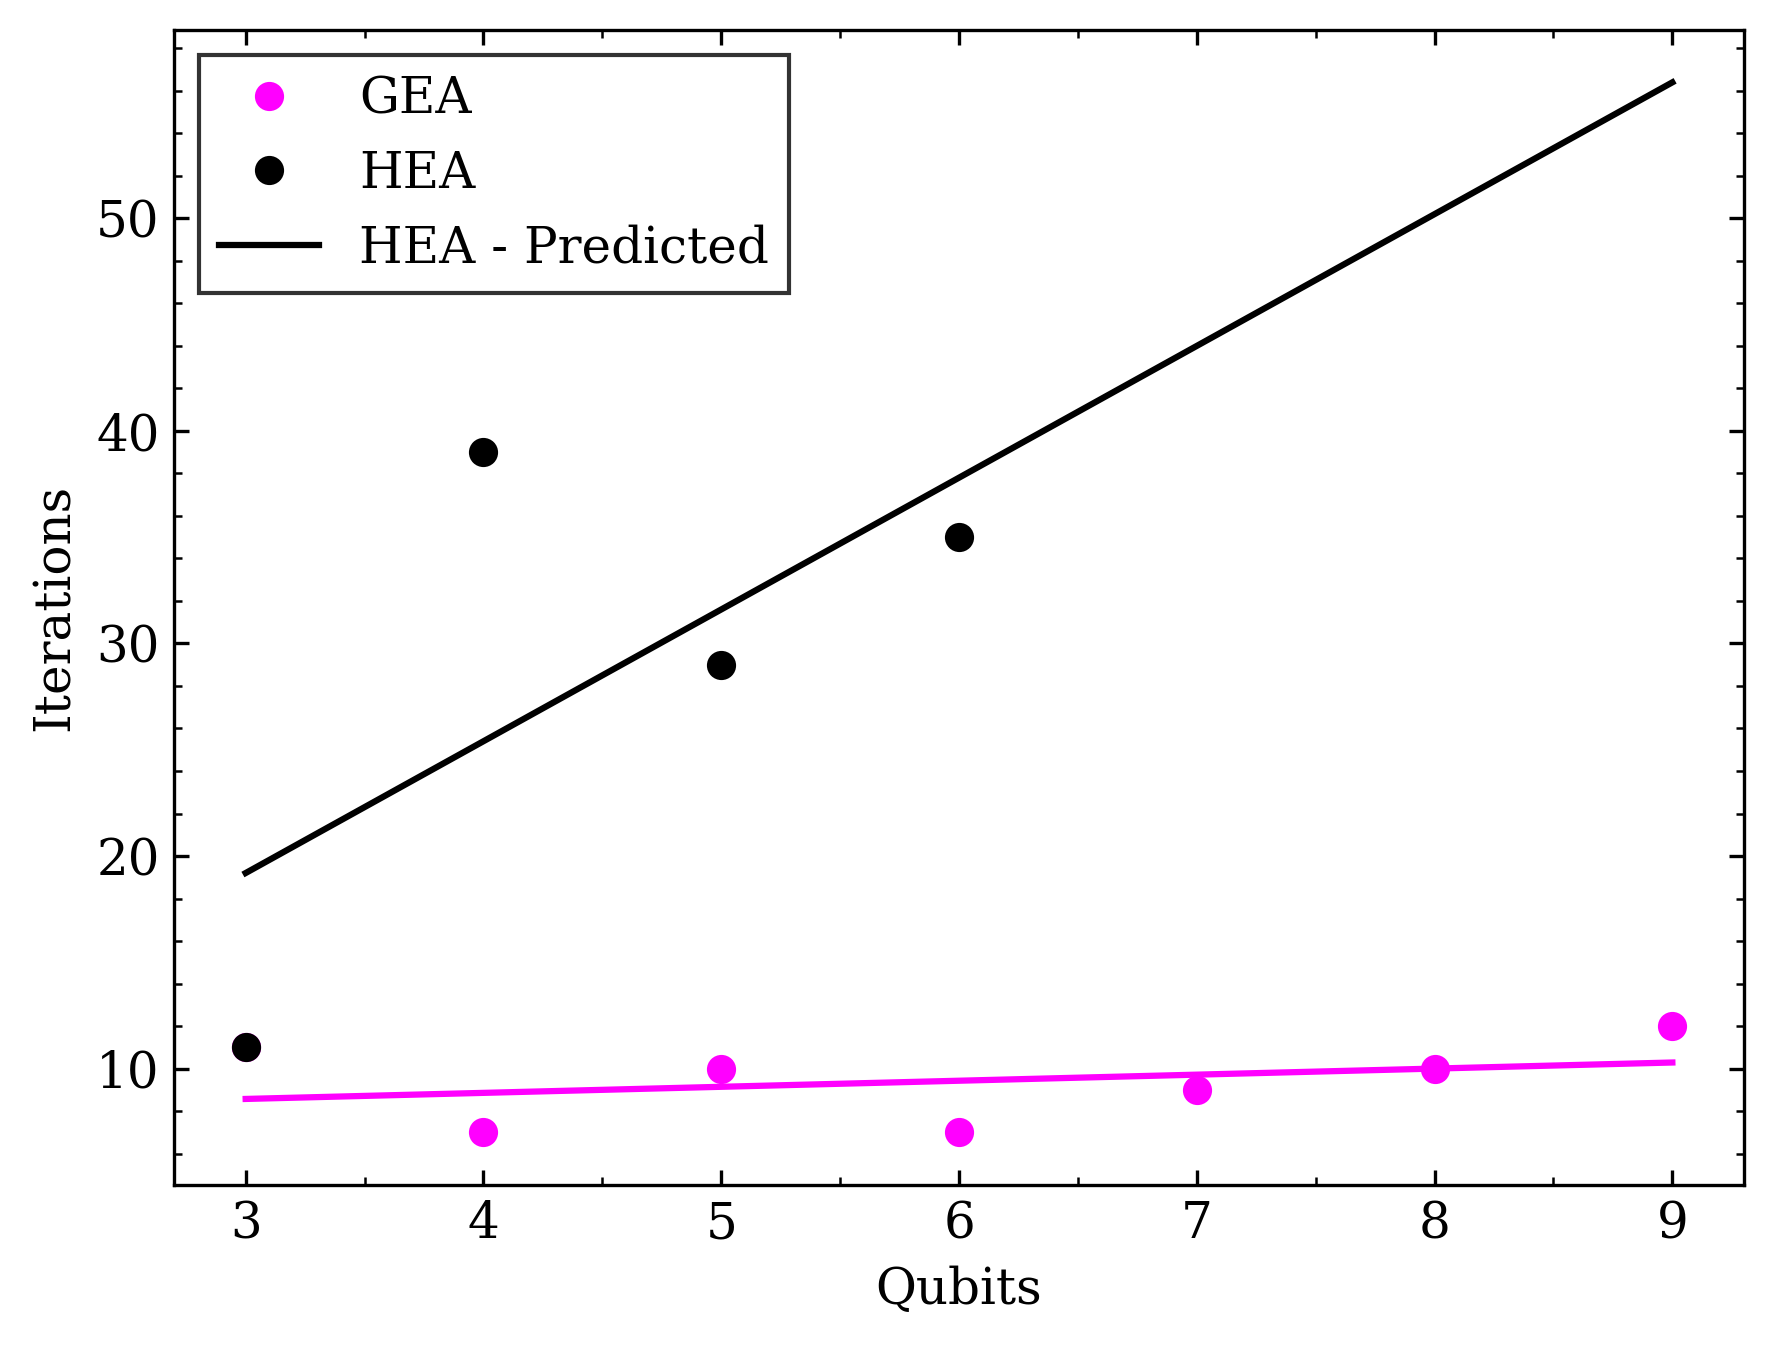

In [189]:
# q_delta = 0.01
# ITERATIONS vs. Qubits
q = list(file.iloc[11:18, 0].array)

# GEA
y = list(file.iloc[11:18, 2].array)
plt.figure(figsize=(6.75,5))
plt.plot(q, y, "o", color=m, label=gea)
plt.plot(np.unique(q), np.poly1d(np.polyfit(q, y, 1))(np.unique(q)), color=m)

# HEA
y = list(file.iloc[11:15, 6].array)
plt.plot(q[:4], y, "o", color=b, label=ta)
plt.plot(np.unique(q), np.poly1d(np.polyfit(q[:4], y, 1))(np.unique(q)), color=b, label="HEA - Predicted")
plt.xlabel("Qubits")
plt.ylabel("Iterations")
ticks_show()
plt.savefig("all_images/evals_vs_qubits/its_vs_qubits_0_01.pdf")


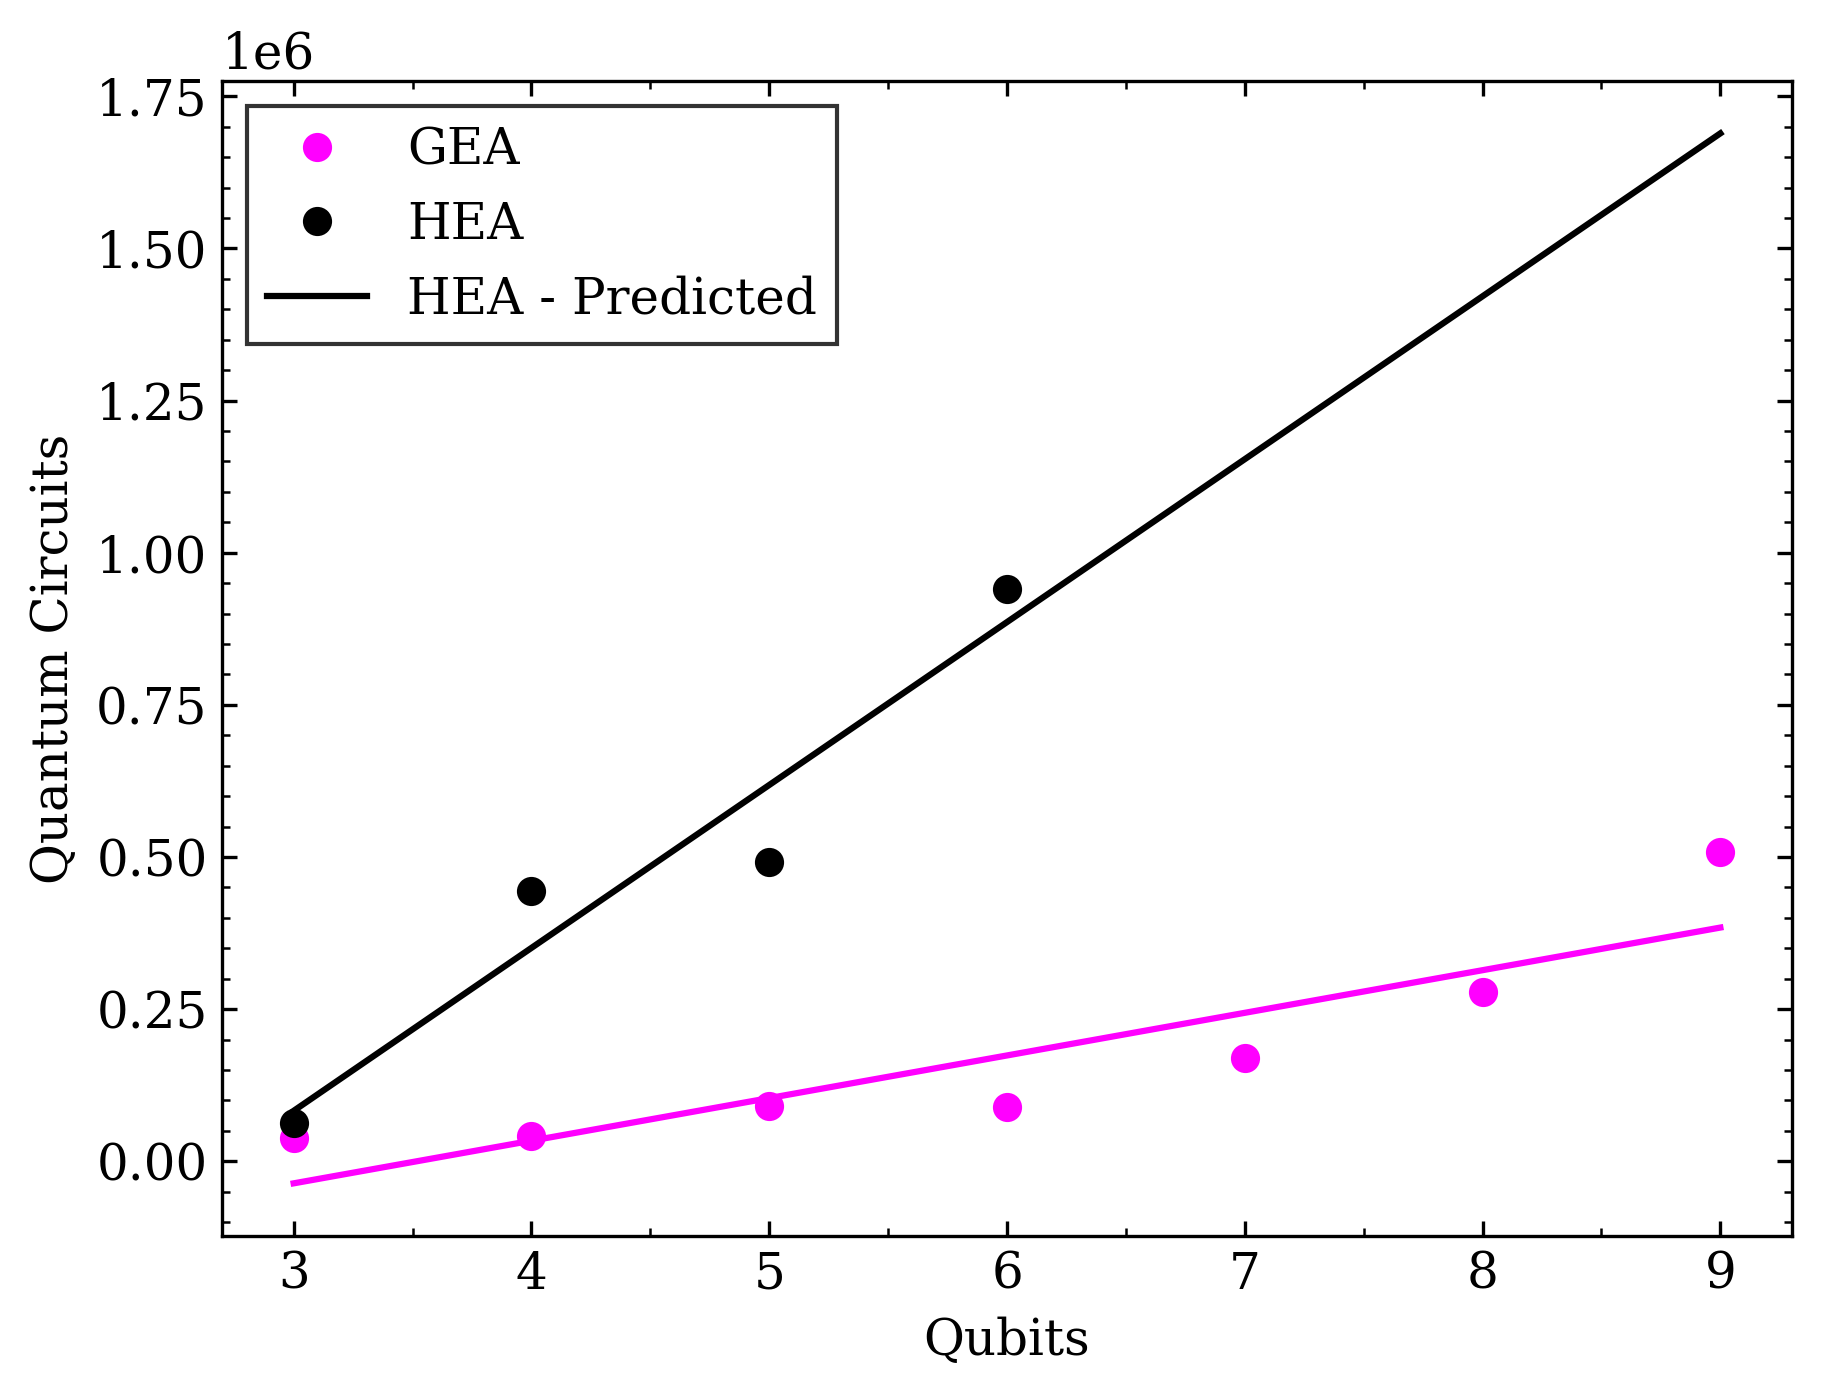

In [190]:

# Only doing the q_delta = 0.01 set because it produced the most amount of results. 

# QCS VS QUBITS

q = list(file.iloc[11:18, 0].array)
# GEA, cost function evaluations vs. qubits
z = list(file.iloc[11:18, 3].array)
# Now showing the number of hours vs. qubits, given an average of 1 minute +- 0.5 min per circuit evaluation. 
# Nq = 10n + 6
# n = x + 3
y = [z[x]*(10*(x+3)+6) for x in range(len(z))] # x is the number of cost function evaluations 
plt.figure(figsize=(6.75,5))
plt.plot(q, y, "o", color=m, label=gea)
plt.plot(np.unique(q), np.poly1d(np.polyfit(q, y, 1))(np.unique(q)), color=m)

# HEA
z = list(file.iloc[11:15, 7].array)
y = [z[x]*(10*(x+3)+6) for x in range(len(z))]
plt.plot(q[:4], y, "o", color=b, label=ta)
plt.plot(np.unique(q), np.poly1d(np.polyfit(q[:4], y, 1))(np.unique(q)), color=b, label="HEA - Predicted")

plt.xlabel("Qubits")
plt.ylabel("Quantum Circuits")
ticks_show()
plt.savefig("all_images/evals_vs_qubits/qcs_vs_qubits_0_01.pdf")

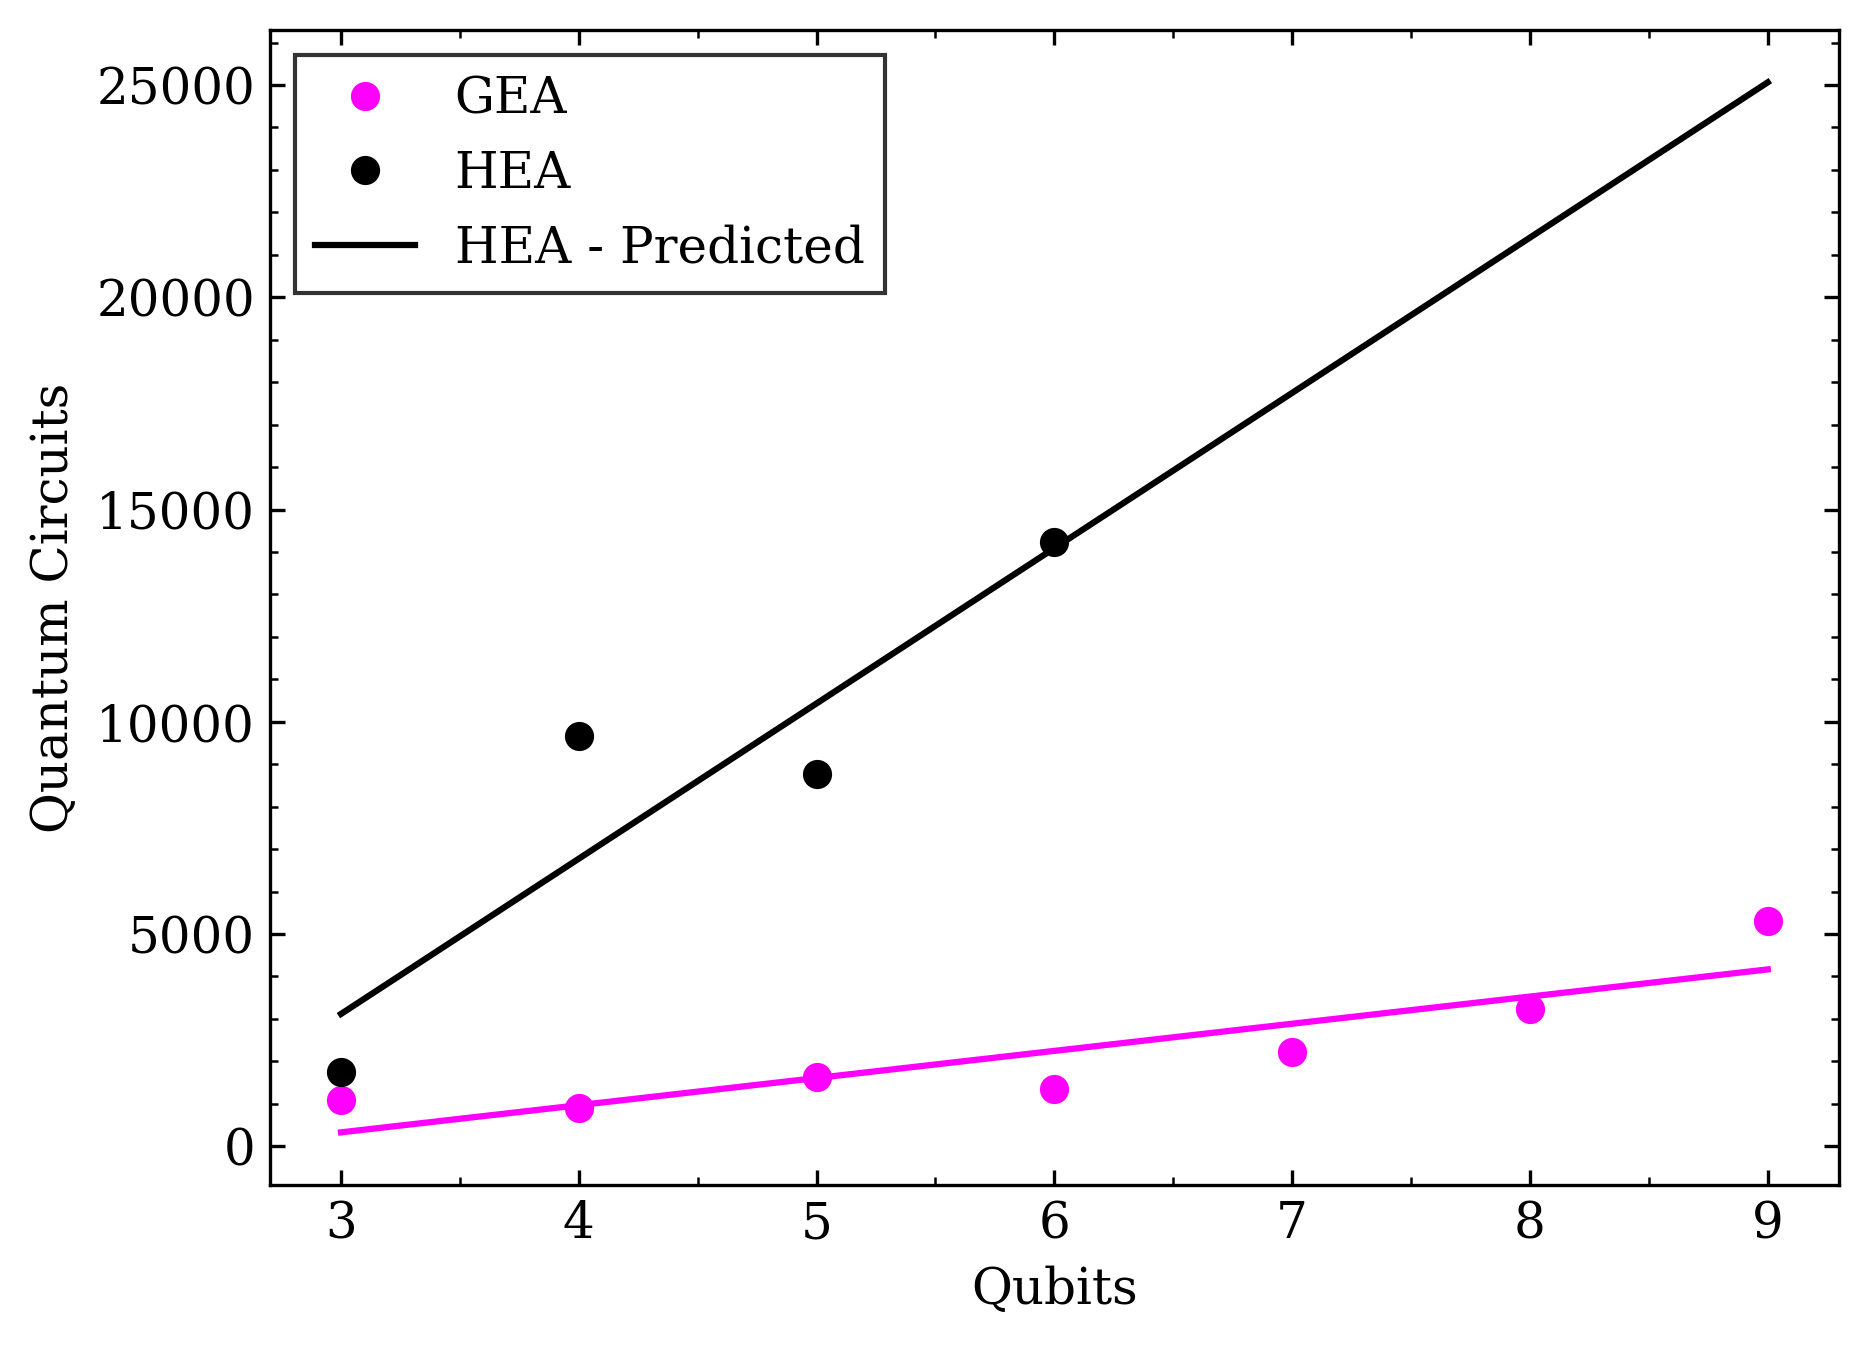

In [191]:

# Only doing the q_delta = 0.01 set because it produced the most amount of results. 

# EVALS VS QUBITS

# QDELT = 0.01, REAL ESTIMATED TIME TO COMPLETE
q = list(file.iloc[11:18, 0].array)
# GEA, cost function evaluations vs. qubits
z = list(file.iloc[11:18, 3].array)
plt.figure(figsize=(6.75,5))
plt.plot(q, z, "o", color=m, label=gea)
plt.plot(np.unique(q), np.poly1d(np.polyfit(q, z, 1))(np.unique(q)), color=m)

# HEA
z = list(file.iloc[11:15, 7].array)
plt.plot(q[:4], z, "o", color=b, label=ta)
plt.plot(np.unique(q), np.poly1d(np.polyfit(q[:4], z, 1))(np.unique(q)), color=b, label="HEA - Predicted")

plt.xlabel("Qubits")
plt.ylabel("Quantum Circuits")
ticks_show()
plt.savefig("all_images/evals_vs_qubits/evals_vs_qubits_0_01.pdf")

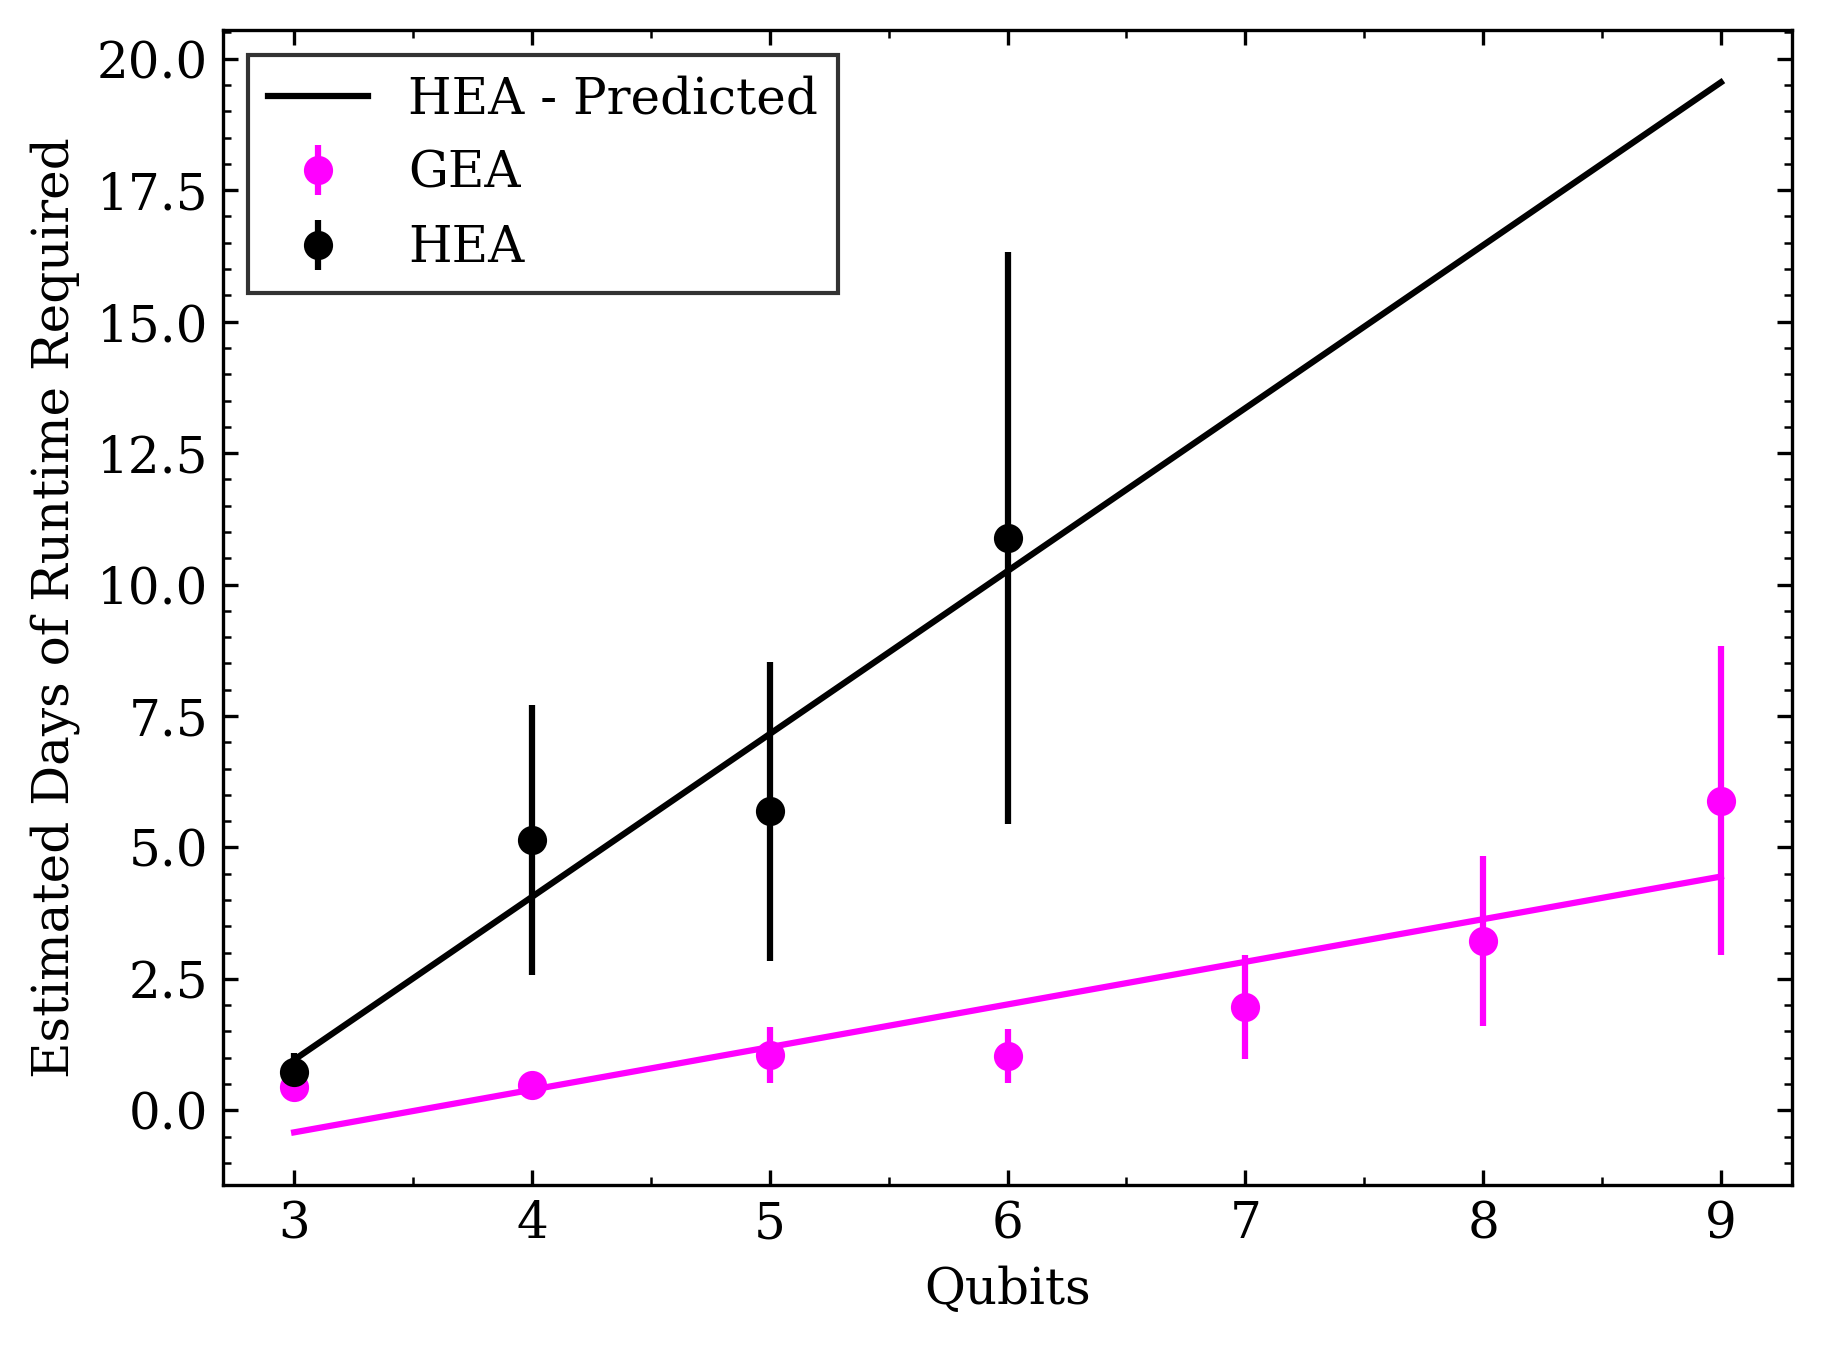

In [192]:

# QDELT = 0.01, REAL ESTIMATED TIME TO COMPLETE
q = list(file.iloc[11:18, 0].array)
# GEA, cost function evaluations vs. qubits
z = list(file.iloc[11:18, 3].array)
days_per_circ_eval = (1/3600)/24
# Now showing the number of hours vs. qubits, given an average of 1 minute +- 0.5 min per circuit evaluation. 
# Nq = 10n + 6
# n = x + 3
y = [z[x]*(10*(x+3)+6)*days_per_circ_eval for x in range(len(z))] # x is the number of cost function evaluations 
yerr = [z[x]*(10*(x+3)+6)*days_per_circ_eval*(0.5/1) for x in range(len(z))] # the error is +-0.5minutes per circuit evaluation 
plt.figure(figsize=(6.75,5))
plt.errorbar(q, y, yerr=yerr, fmt="o", color=m, label=gea)
plt.plot(np.unique(q), np.poly1d(np.polyfit(q, y, 1))(np.unique(q)), color=m)

# HEA
z = list(file.iloc[11:15, 7].array)
y = [z[x]*(10*(x+3)+6)*days_per_circ_eval for x in range(len(z))]
yerr = [z[x]*(10*(x+3)+6)*days_per_circ_eval*(0.5/1) for x in range(len(z))]
plt.errorbar(q[:4], y, yerr=yerr, fmt="o", color=b, label=ta)
plt.plot(np.unique(q), np.poly1d(np.polyfit(q[:4], y, 1))(np.unique(q)), color=b, label="HEA - Predicted")

plt.xlabel("Qubits")
plt.ylabel("Estimated Days of Runtime Required")
ticks_show()
plt.savefig("all_images/evals_vs_qubits/days_vs_qubits_0_01.pdf")

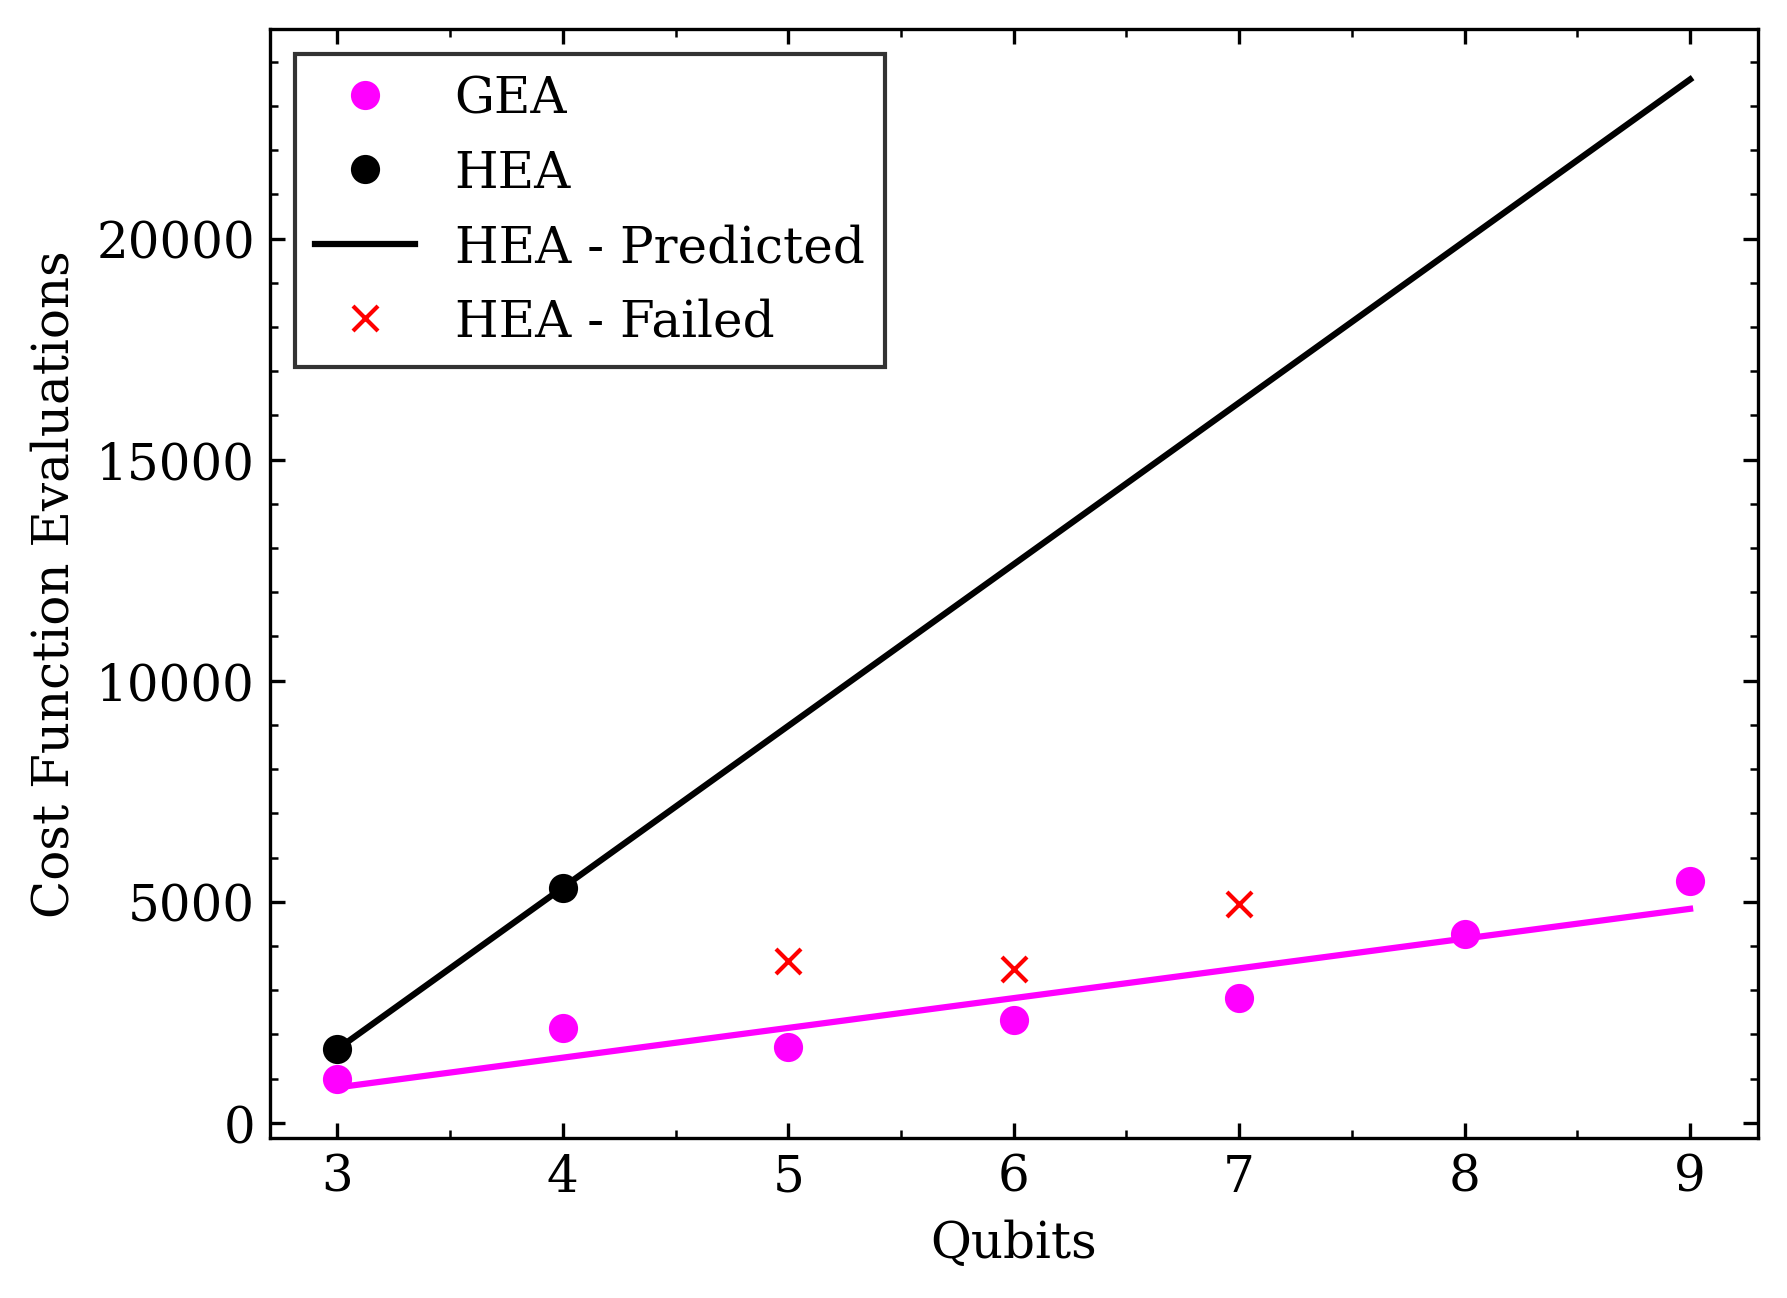

In [197]:
# q_delta = 0.1
# Cost Function Evaluations vs. Qubits
q = list(file.iloc[1:8, 0].array)

# GEA
y = list(file.iloc[1:8, 3].array)
plt.figure()
plt.plot(q, y, "o", color=m, label=gea)
plt.plot(np.unique(q), np.poly1d(np.polyfit(q, y, 1))(np.unique(q)), color=m)

# HEA
y = list(file.iloc[1:3, 7].array)
plt.plot(q[:2], y, "o", color=b, label=ta)
plt.plot(np.unique(q), np.poly1d(np.polyfit(q[:2], y, 1))(np.unique(q)), color=b, label="HEA - Predicted")

y = list(file.iloc[3:8, 7].array)
plt.plot(q[2:], y, "x", color="red", label="HEA - Failed")

plt.xlabel("Qubits")
plt.ylabel("Cost Function Evaluations")
ticks_show()
plt.savefig("all_images/evals_vs_qubits/evals_vs_qubits_0_1.pdf")

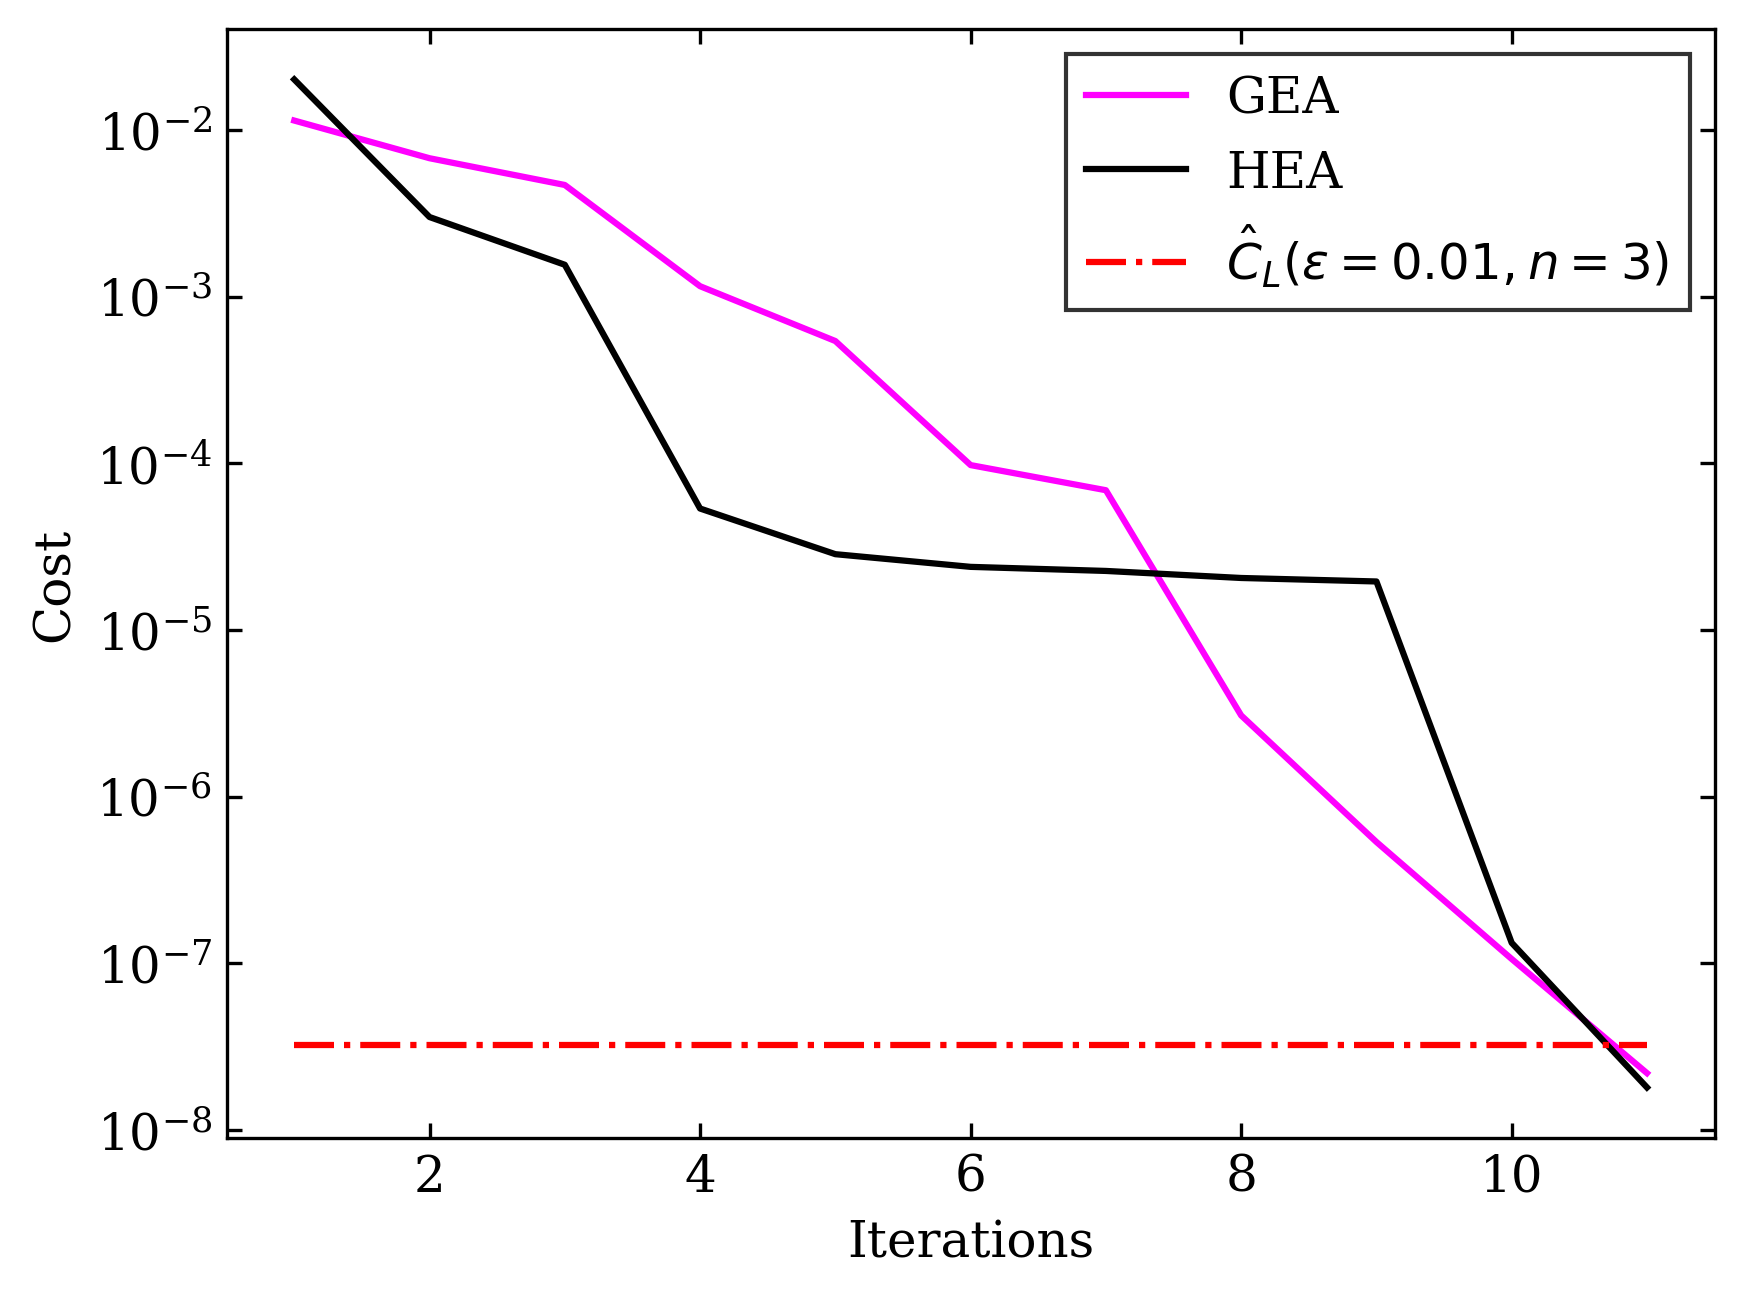

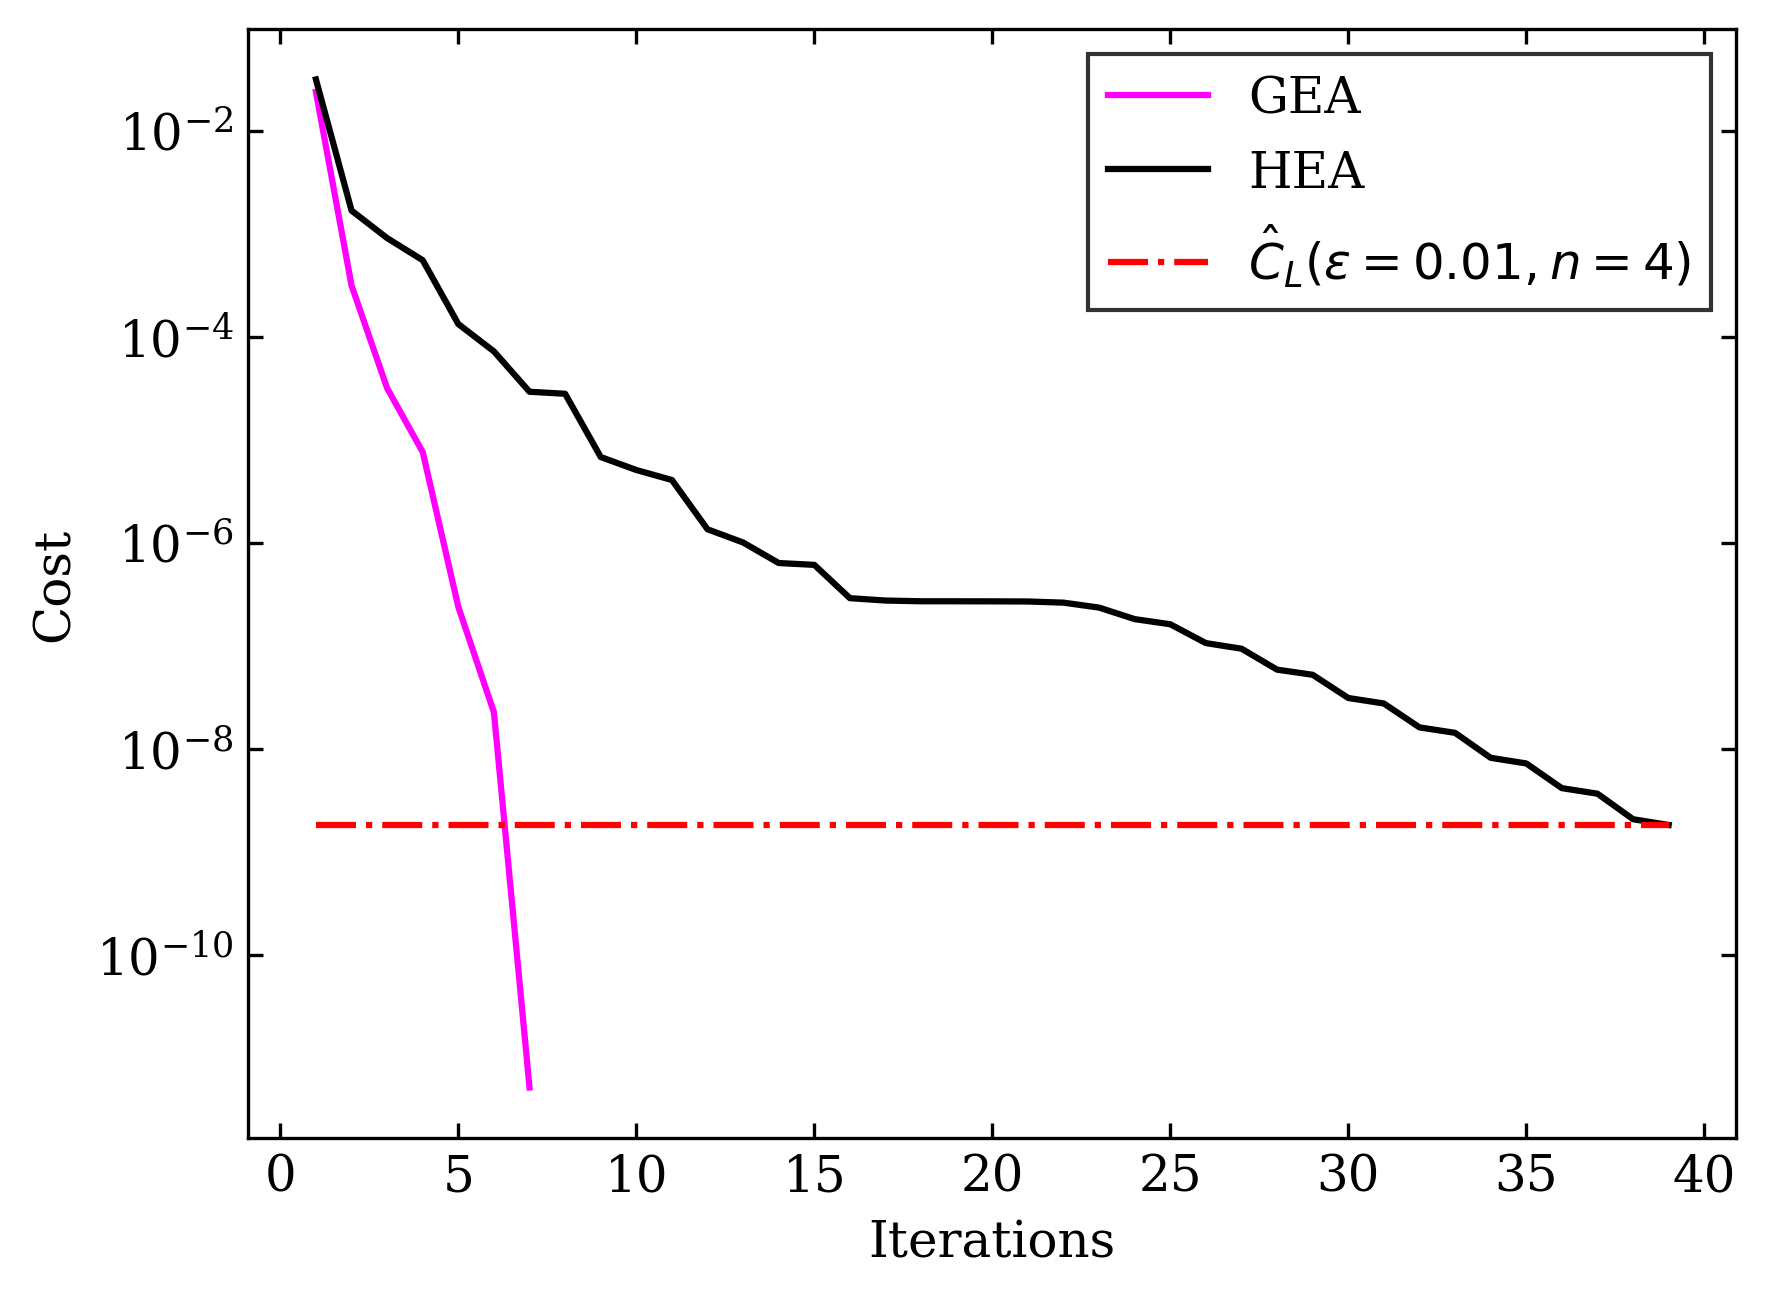

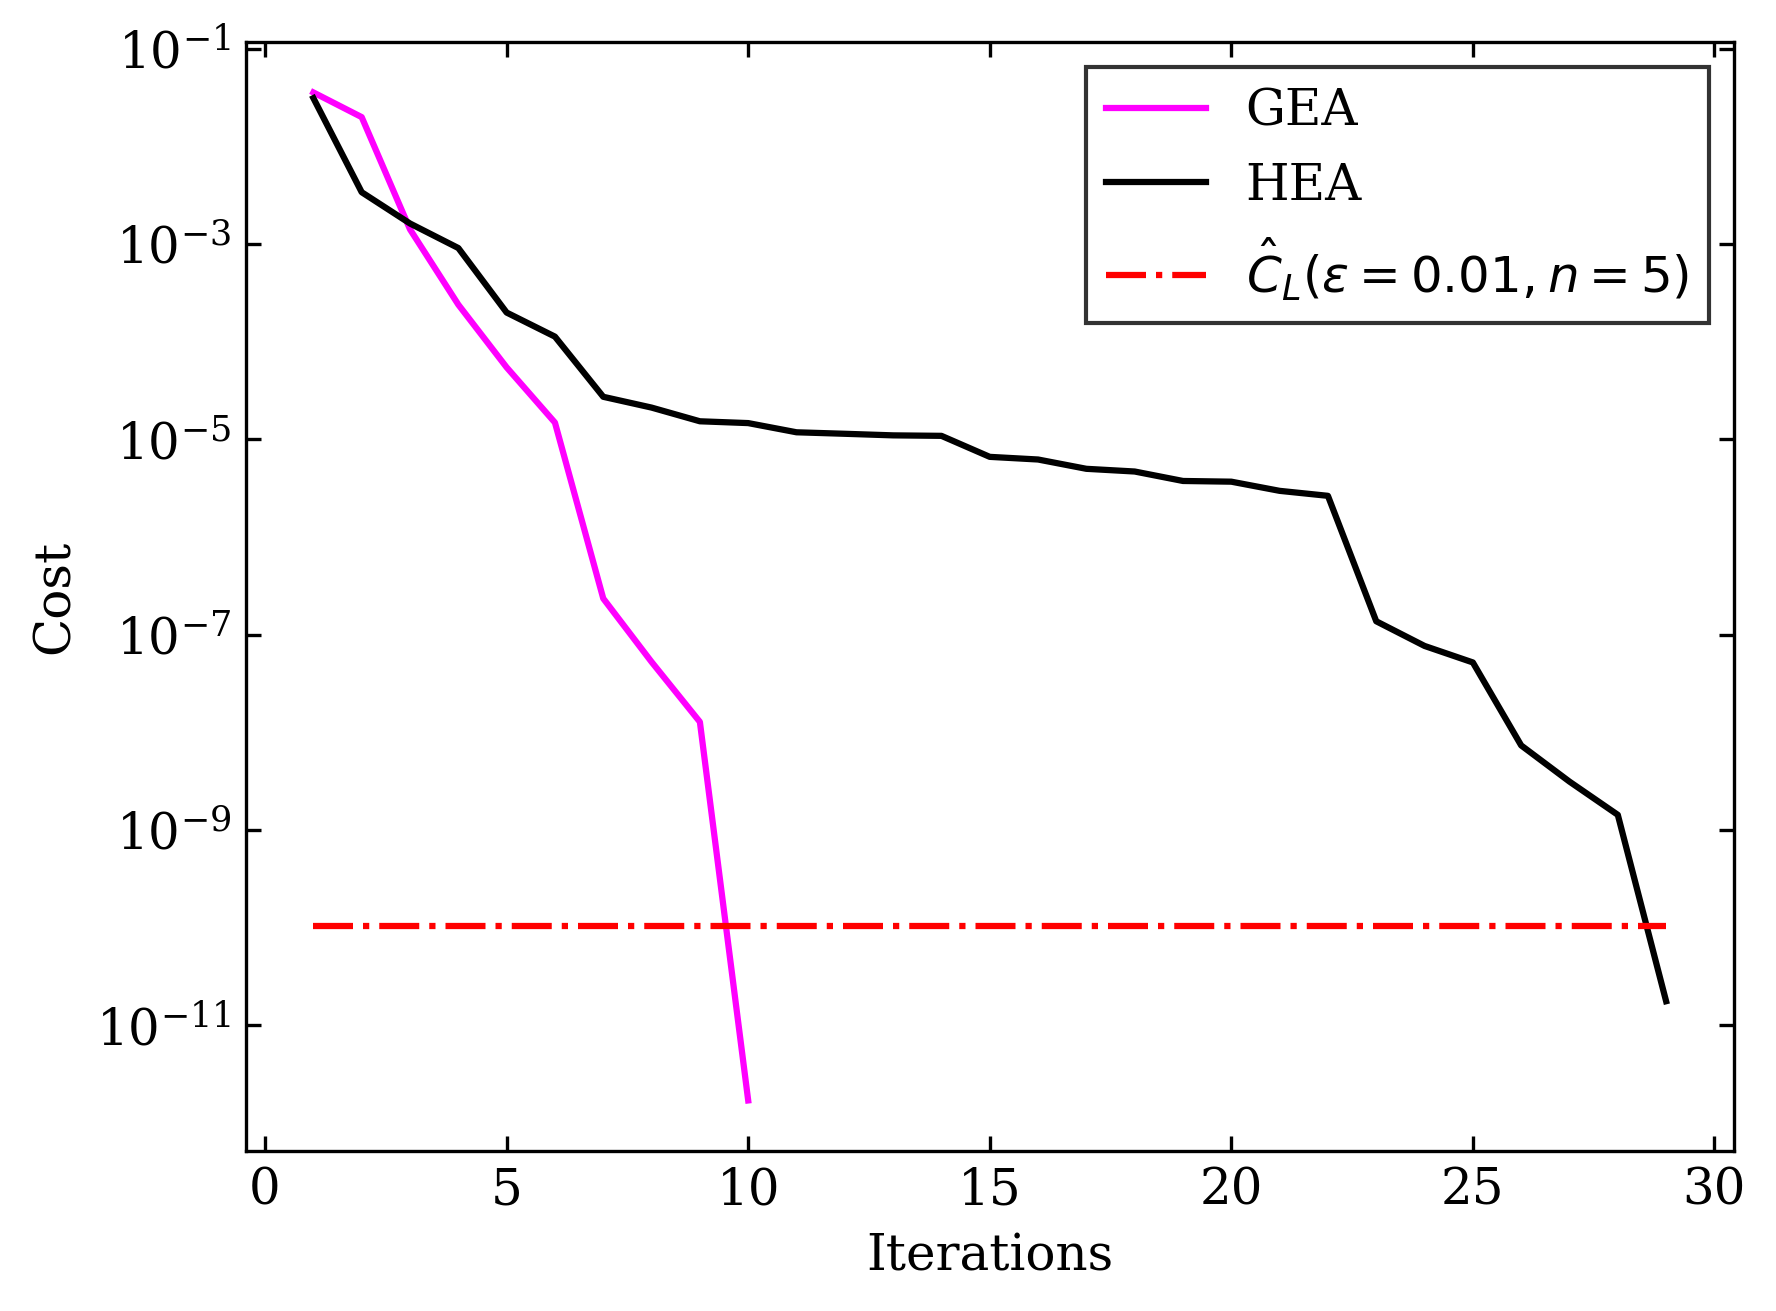

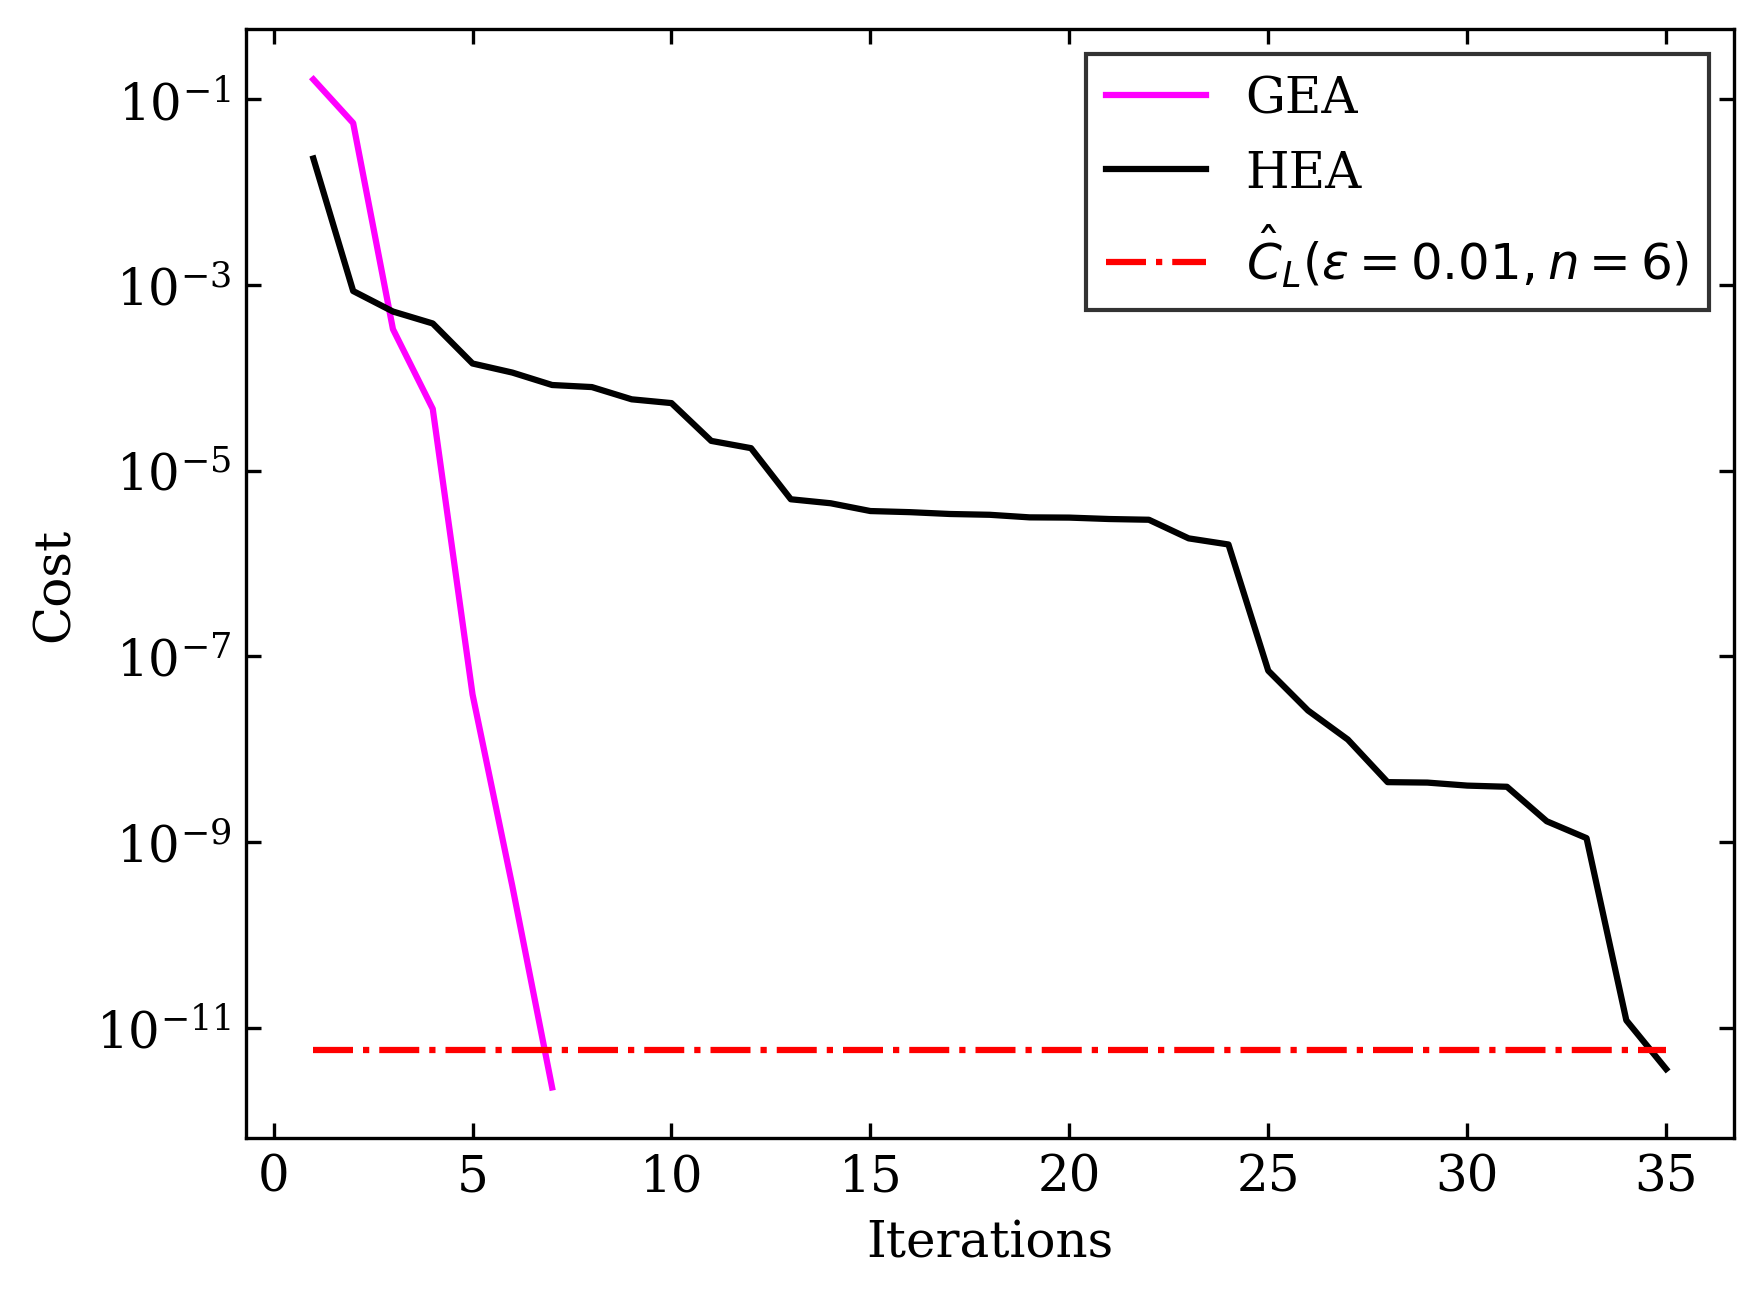

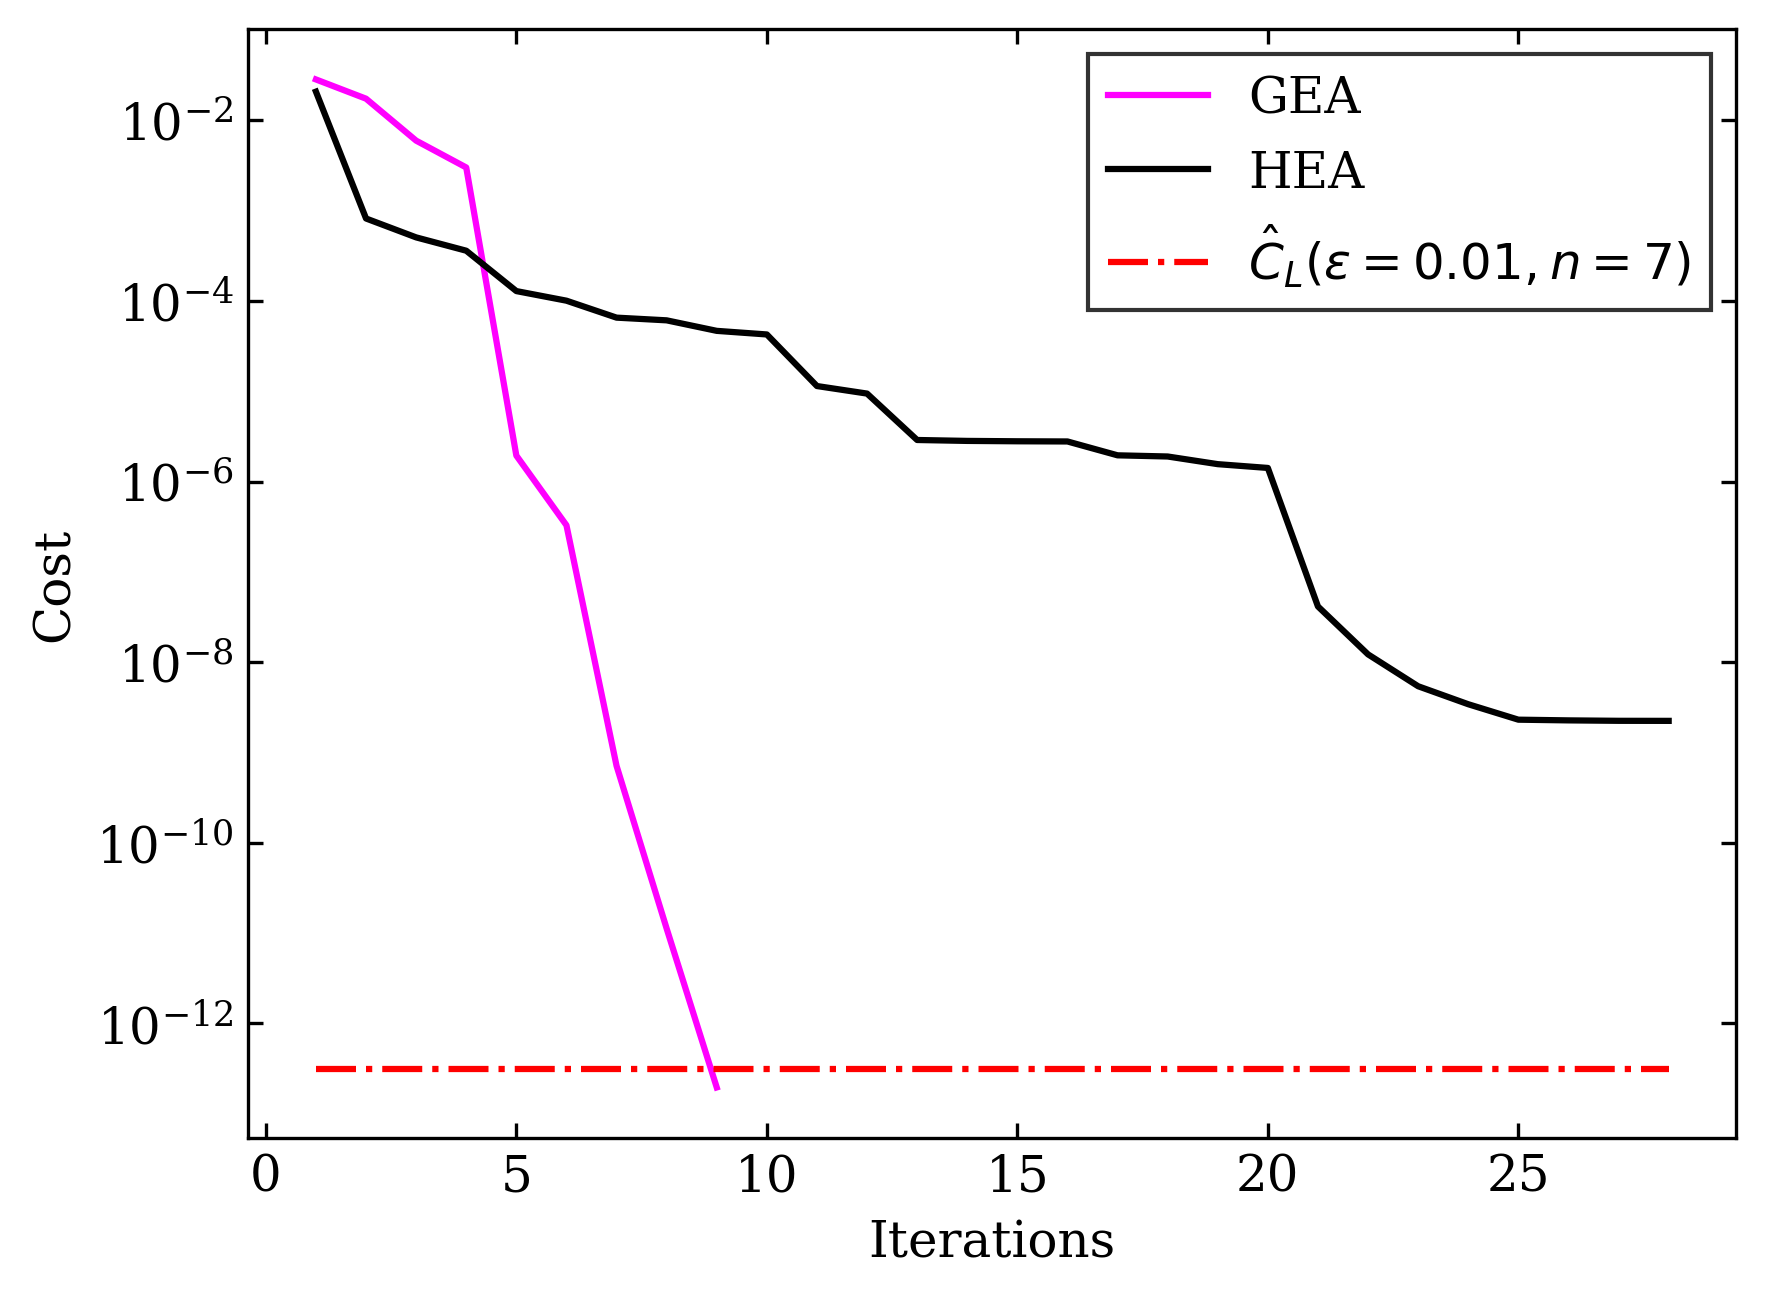

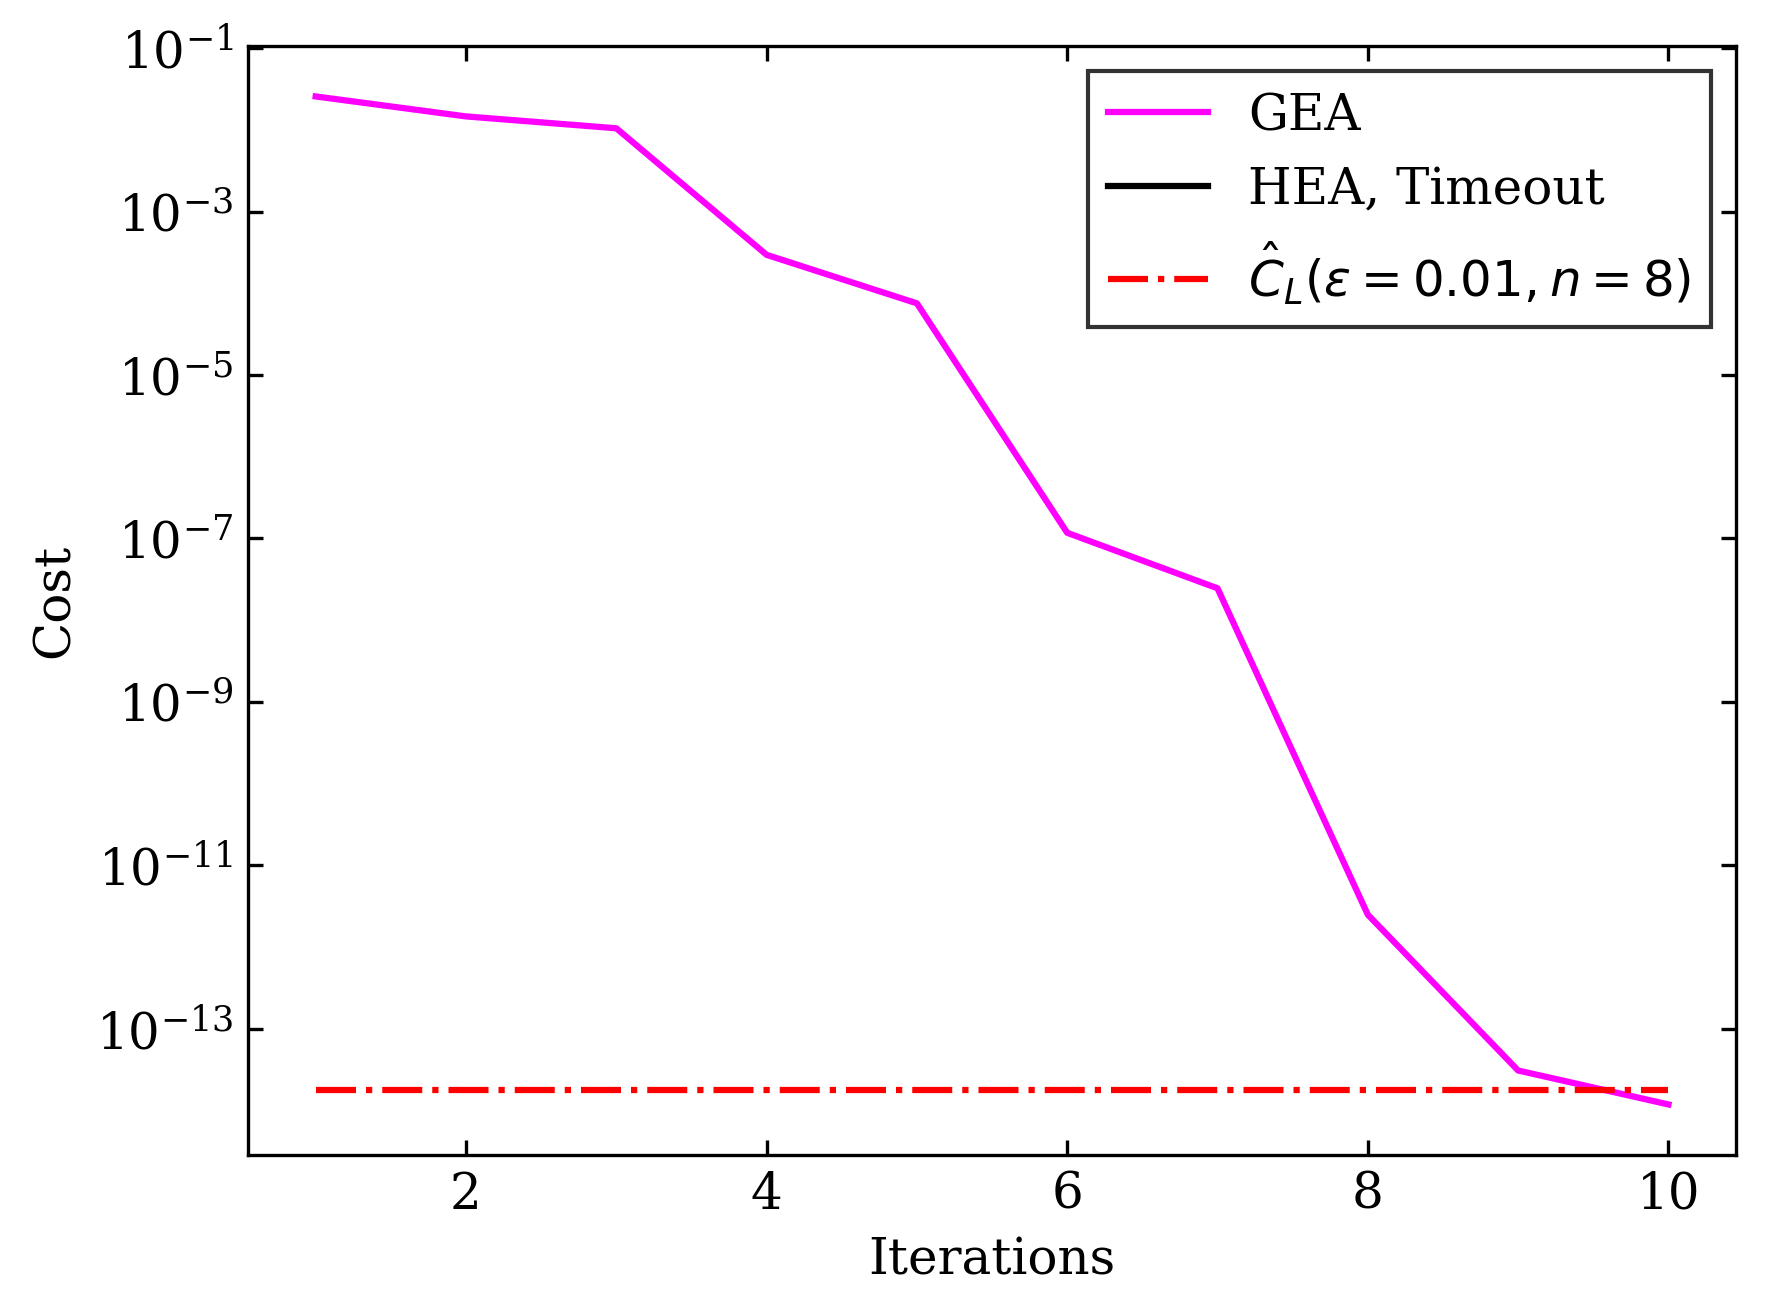

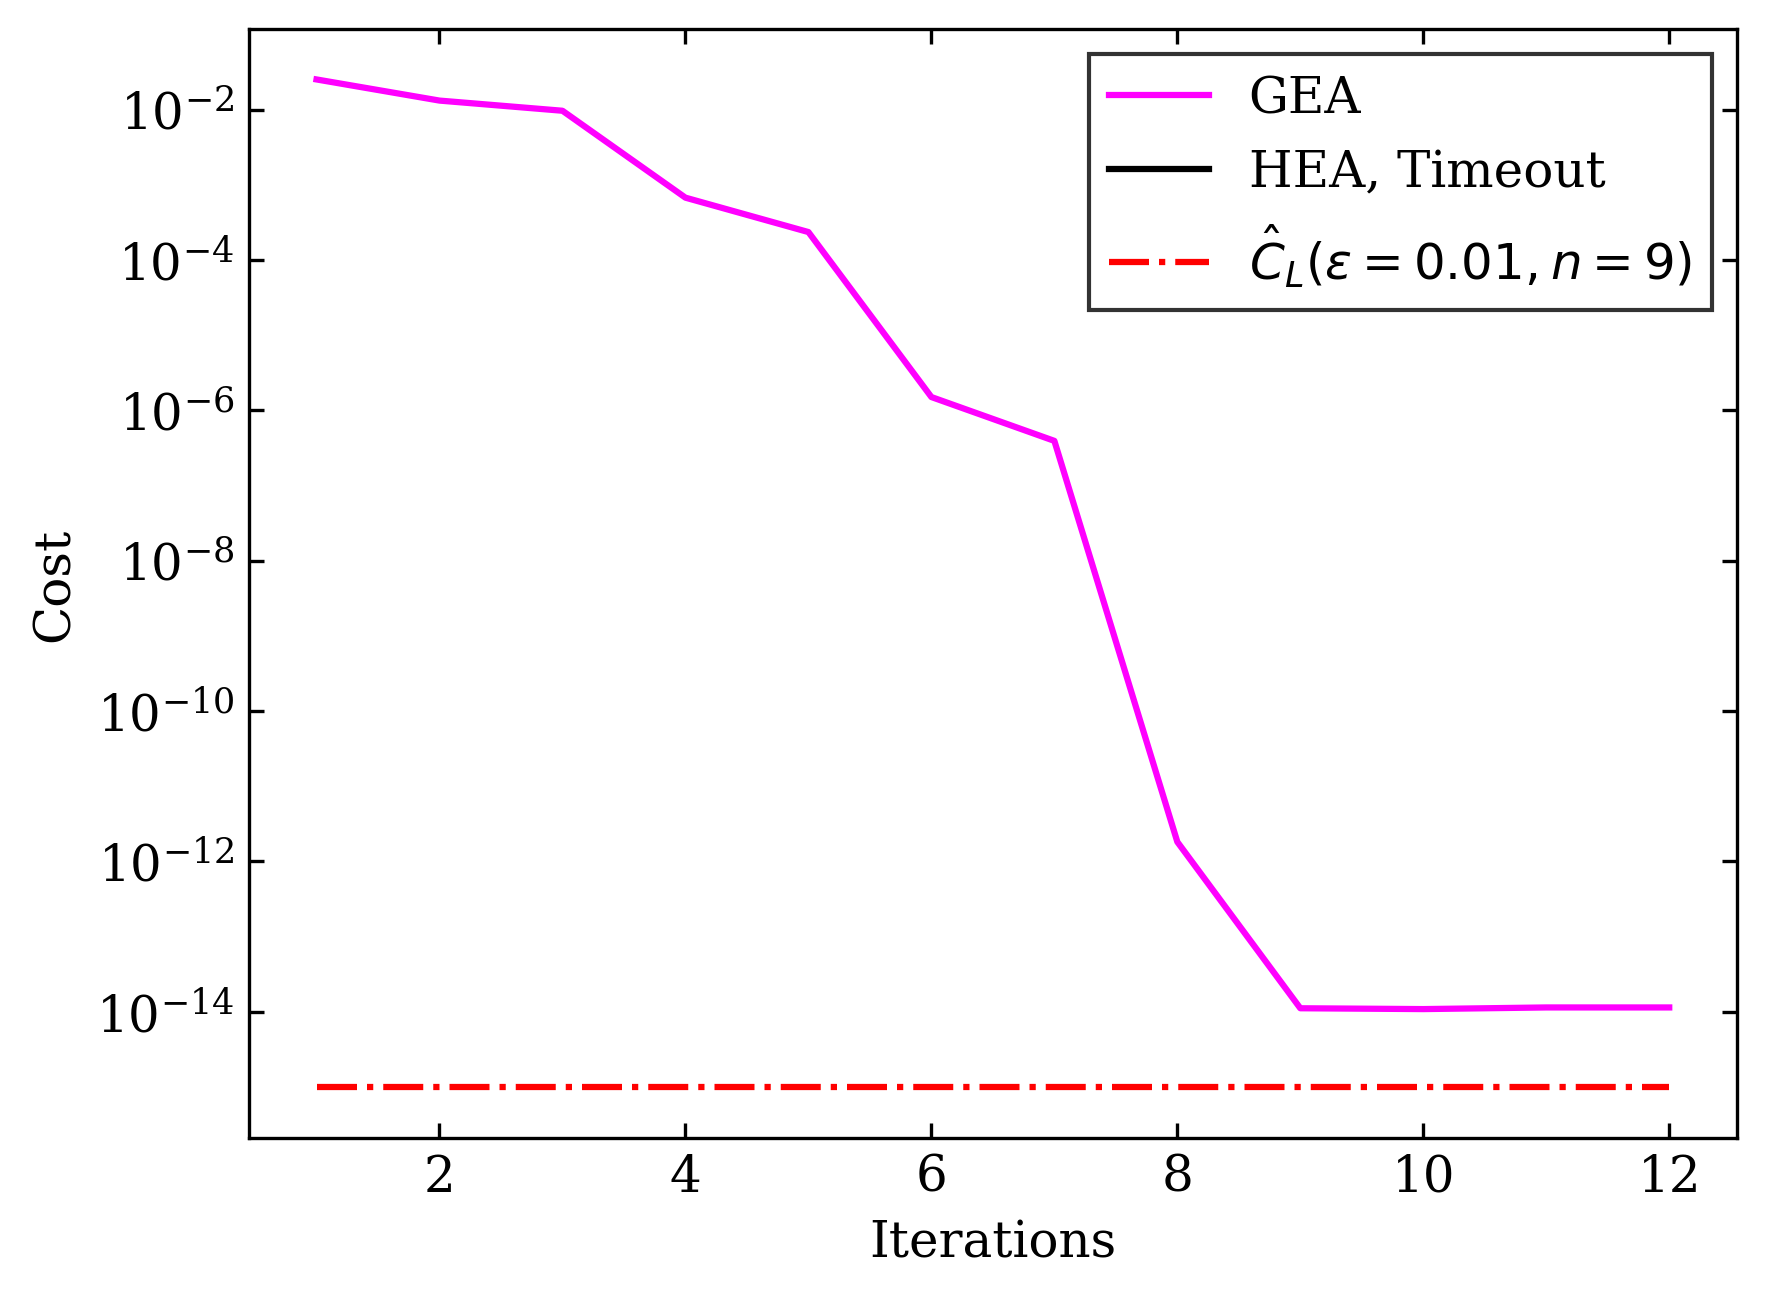

In [198]:
# Cost vs. Iterations, 3-9 QUBITS, q_delta = 0.01

vals_gea = [60, 57, 59, 56, 58, 59, 61]
vals_hea = [60, 88, 78, 84, 77, 50, 50]

for i in range(len(vals_gea)):
    gamma = file.iloc[1+i, 1]

    # GEA
    yg = list(file.iloc[49:vals_gea[i], i])
    plt.figure()
    plt.semilogy([x+1 for x in range(len(yg))], yg, "-", color=m, label=gea)

    # HEA
    if(i < 5):
        yh = list(file.iloc[49:vals_hea[i], 9+i])
        plt.semilogy([x+1 for x in range(len(yh))], yh, "-", color=b, label=ta)
    else:
        yh = []
        plt.semilogy([x+1 for x in range(len(yh))], yh, "-", color=b, label=(ta + ", Timeout"))


    plt.semilogy([x+1 for x in range(max(len(yg),len(yh)))], [gamma for x in range(max(len(yg),len(yh)))], "-.", color="red", label="$\hat{C}_L(\epsilon=0.01, n=" + str(i+3) + ")$")

    plt.xlabel("Iterations")
    plt.ylabel("Cost")
    ticks_show()
    plt.minorticks_off()
    plt.savefig("all_images/cost_vs_qubits_0_01/cost_vs_qubits_n_" + str(i+3) + ".pdf")

    

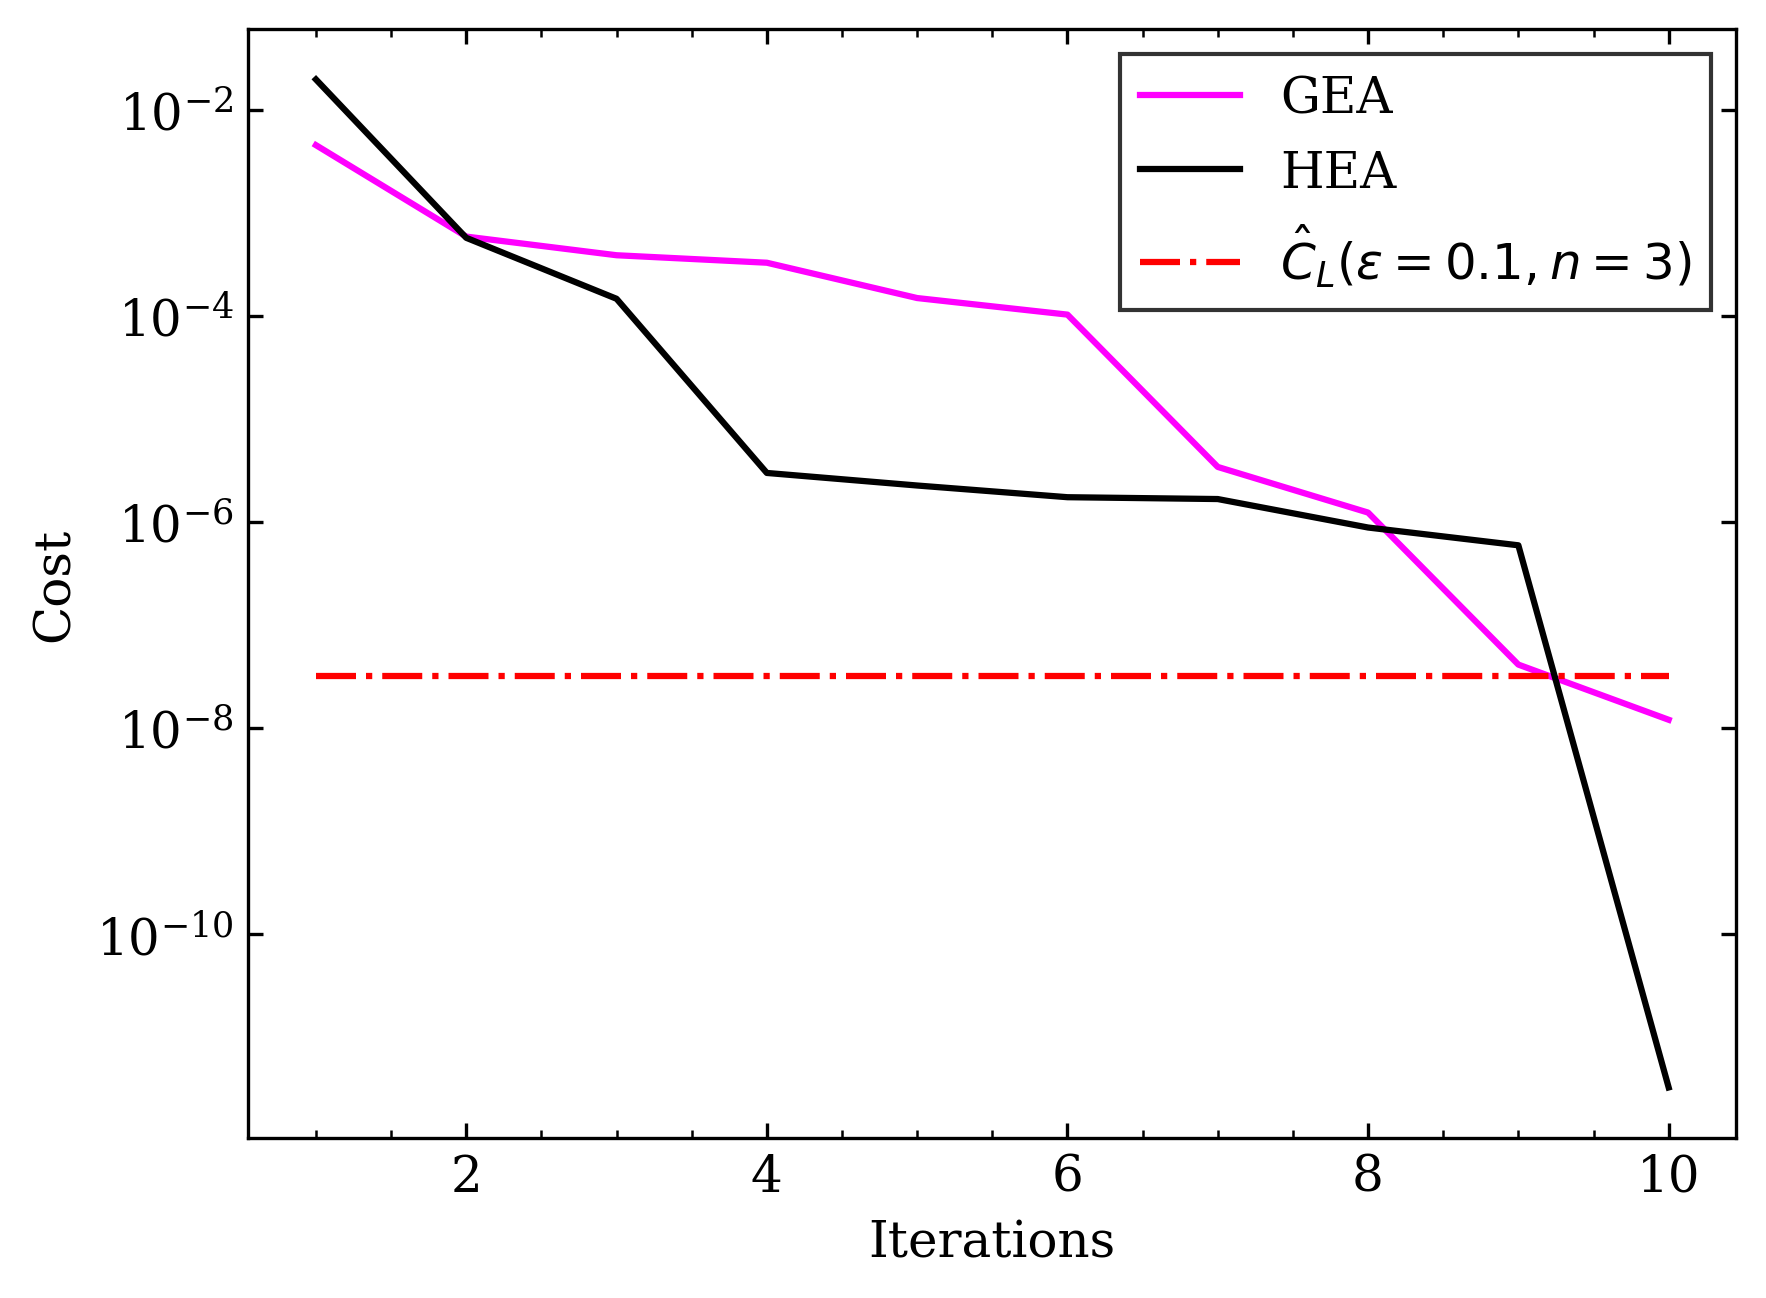

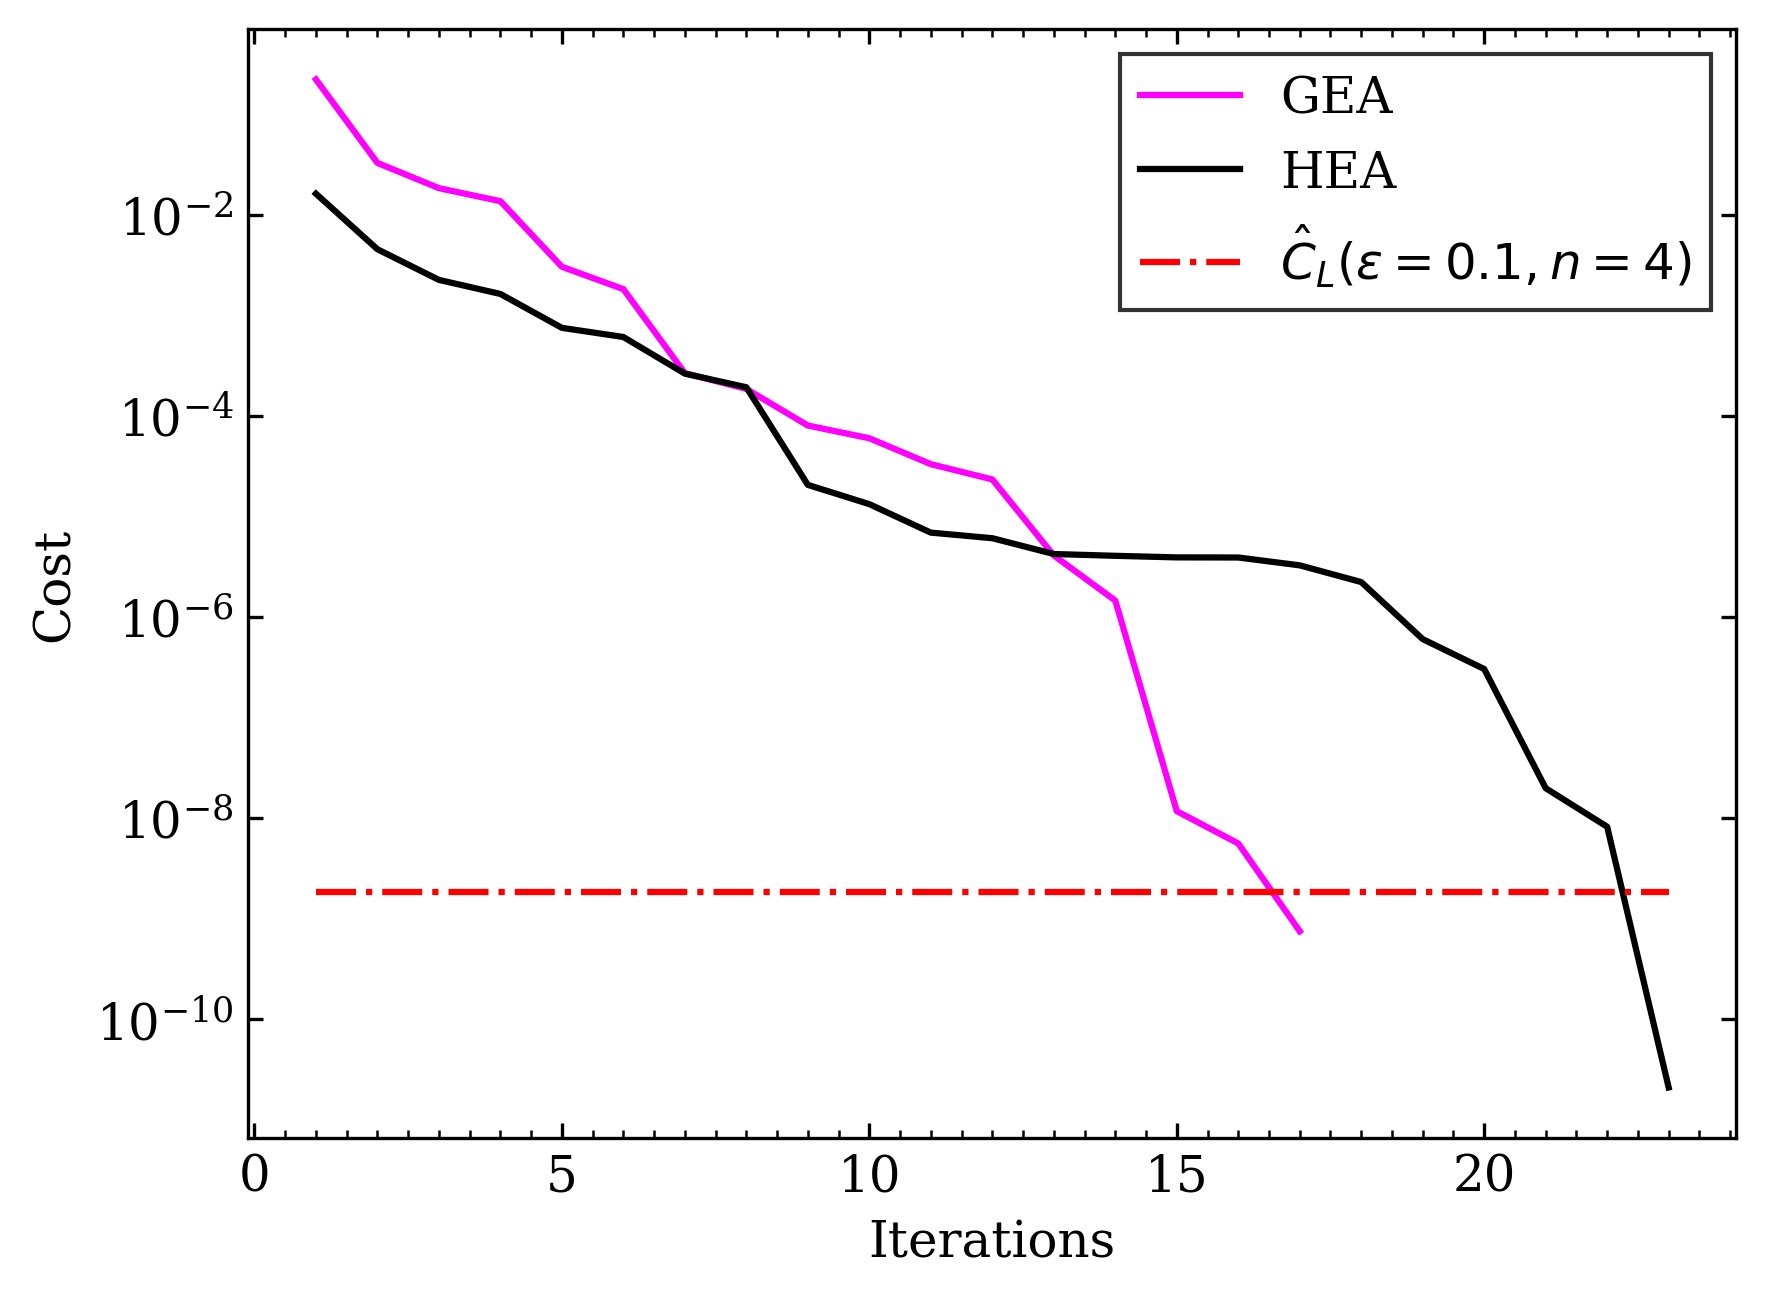

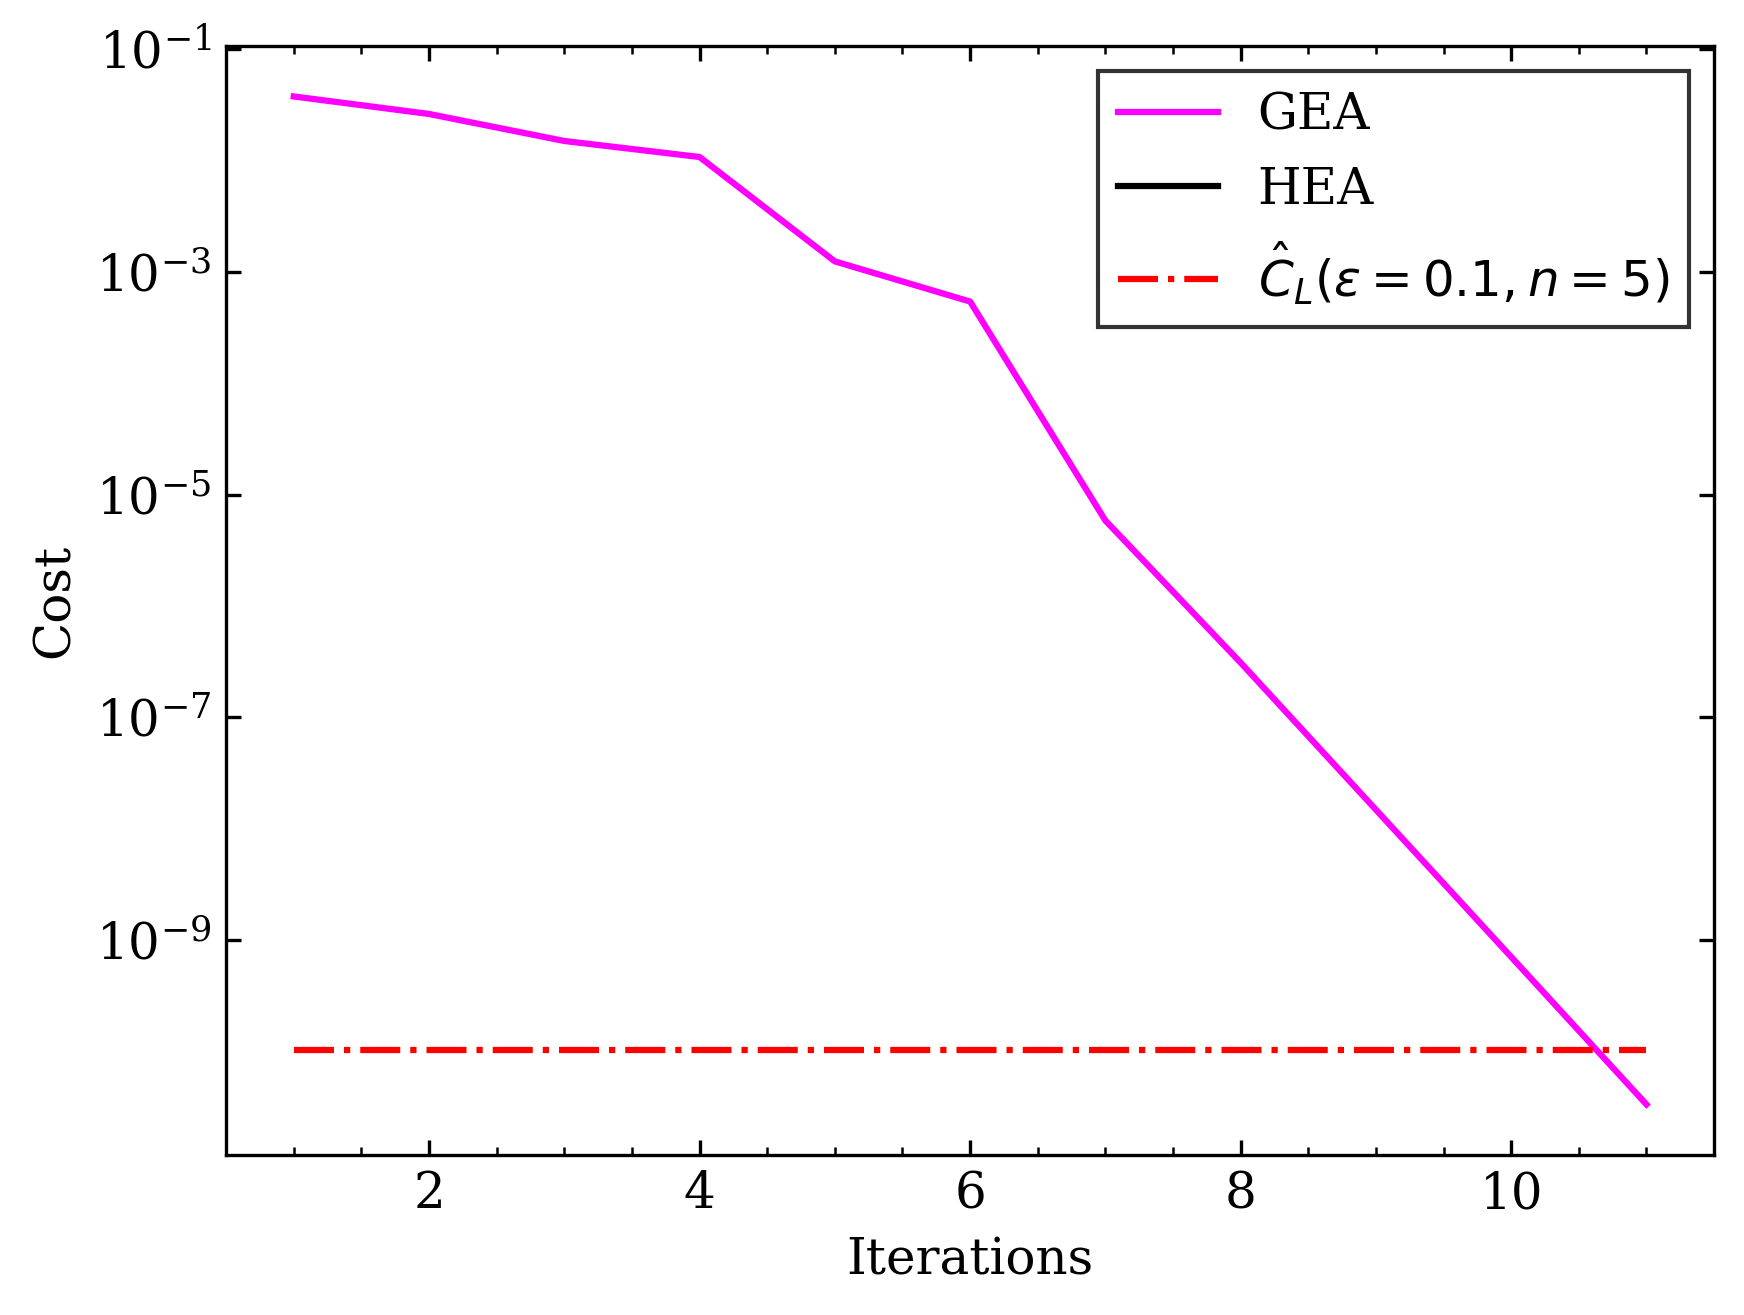

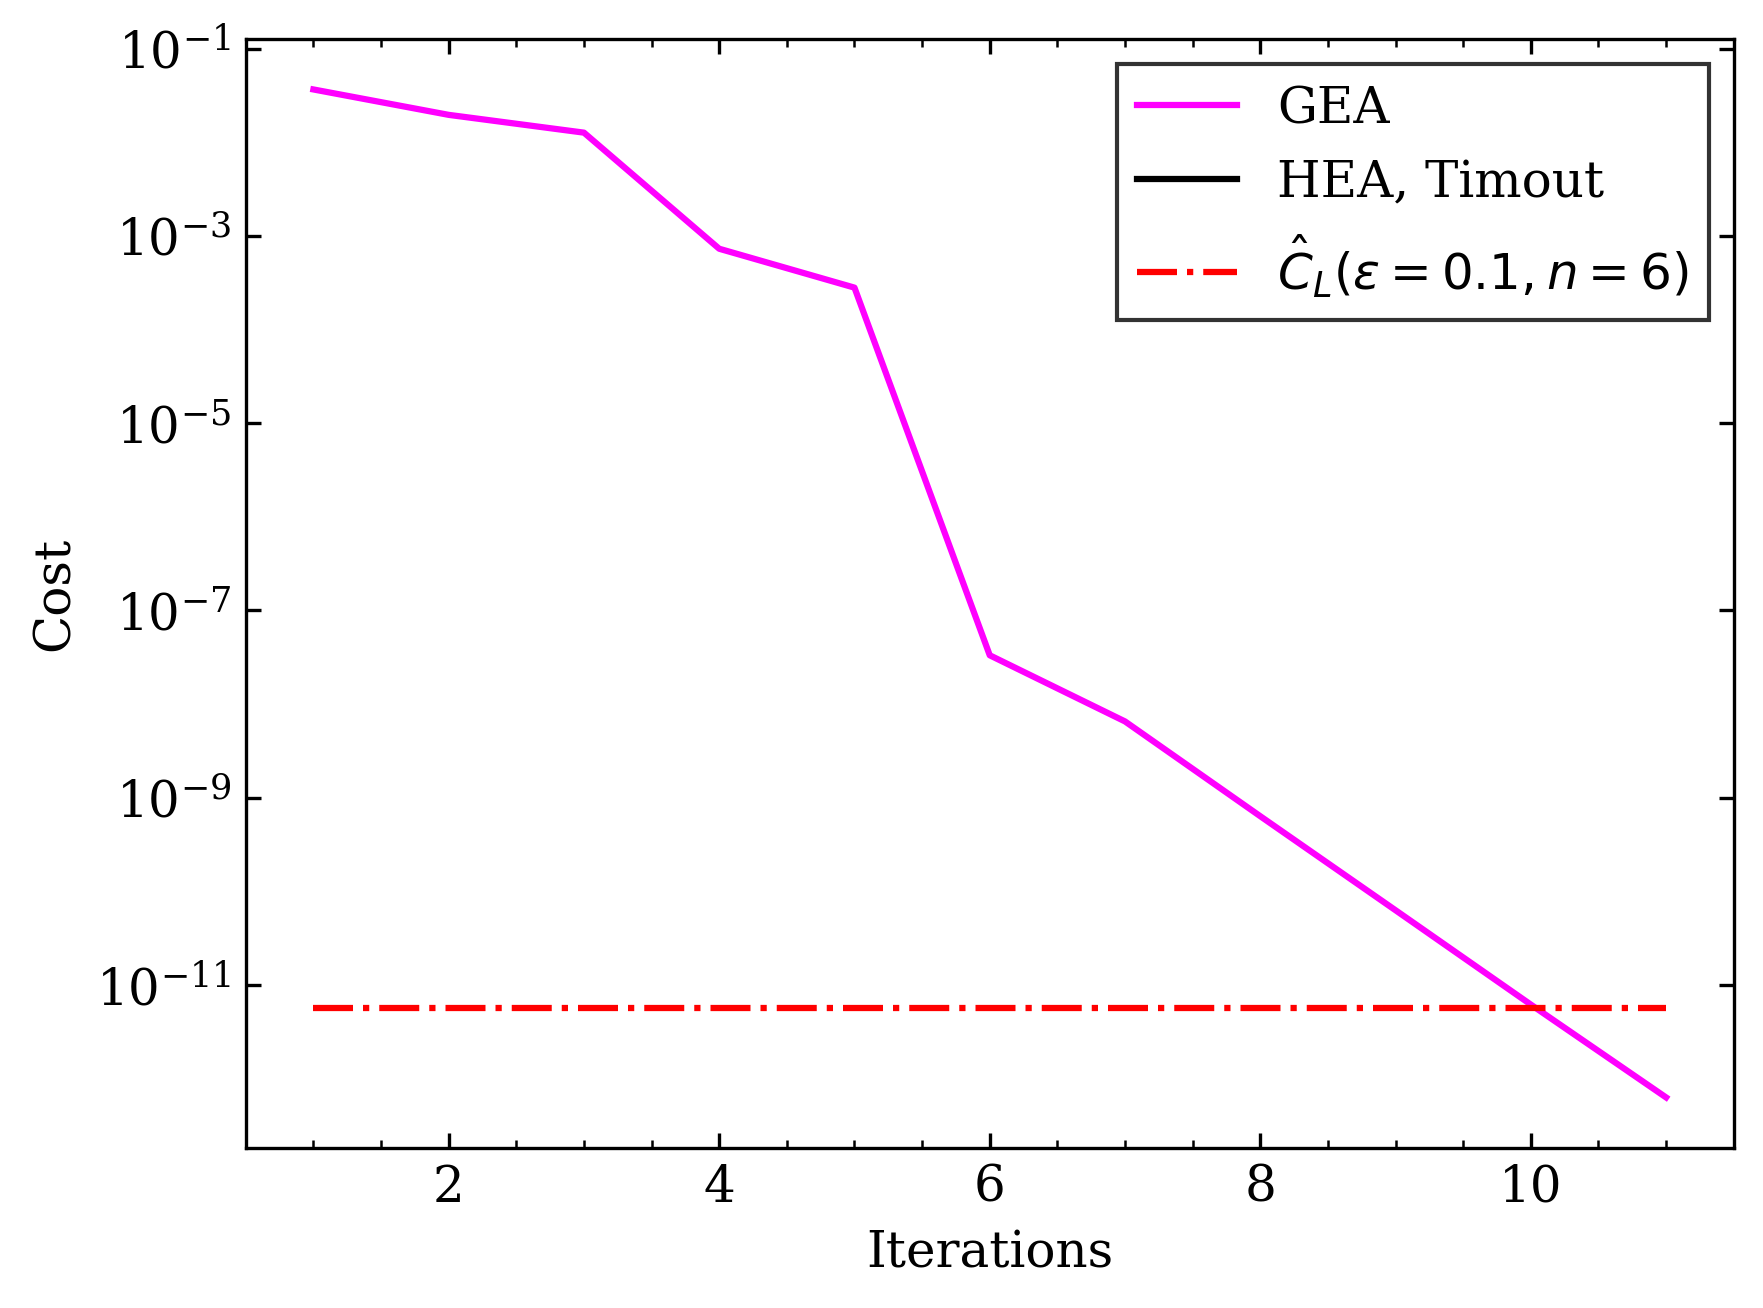

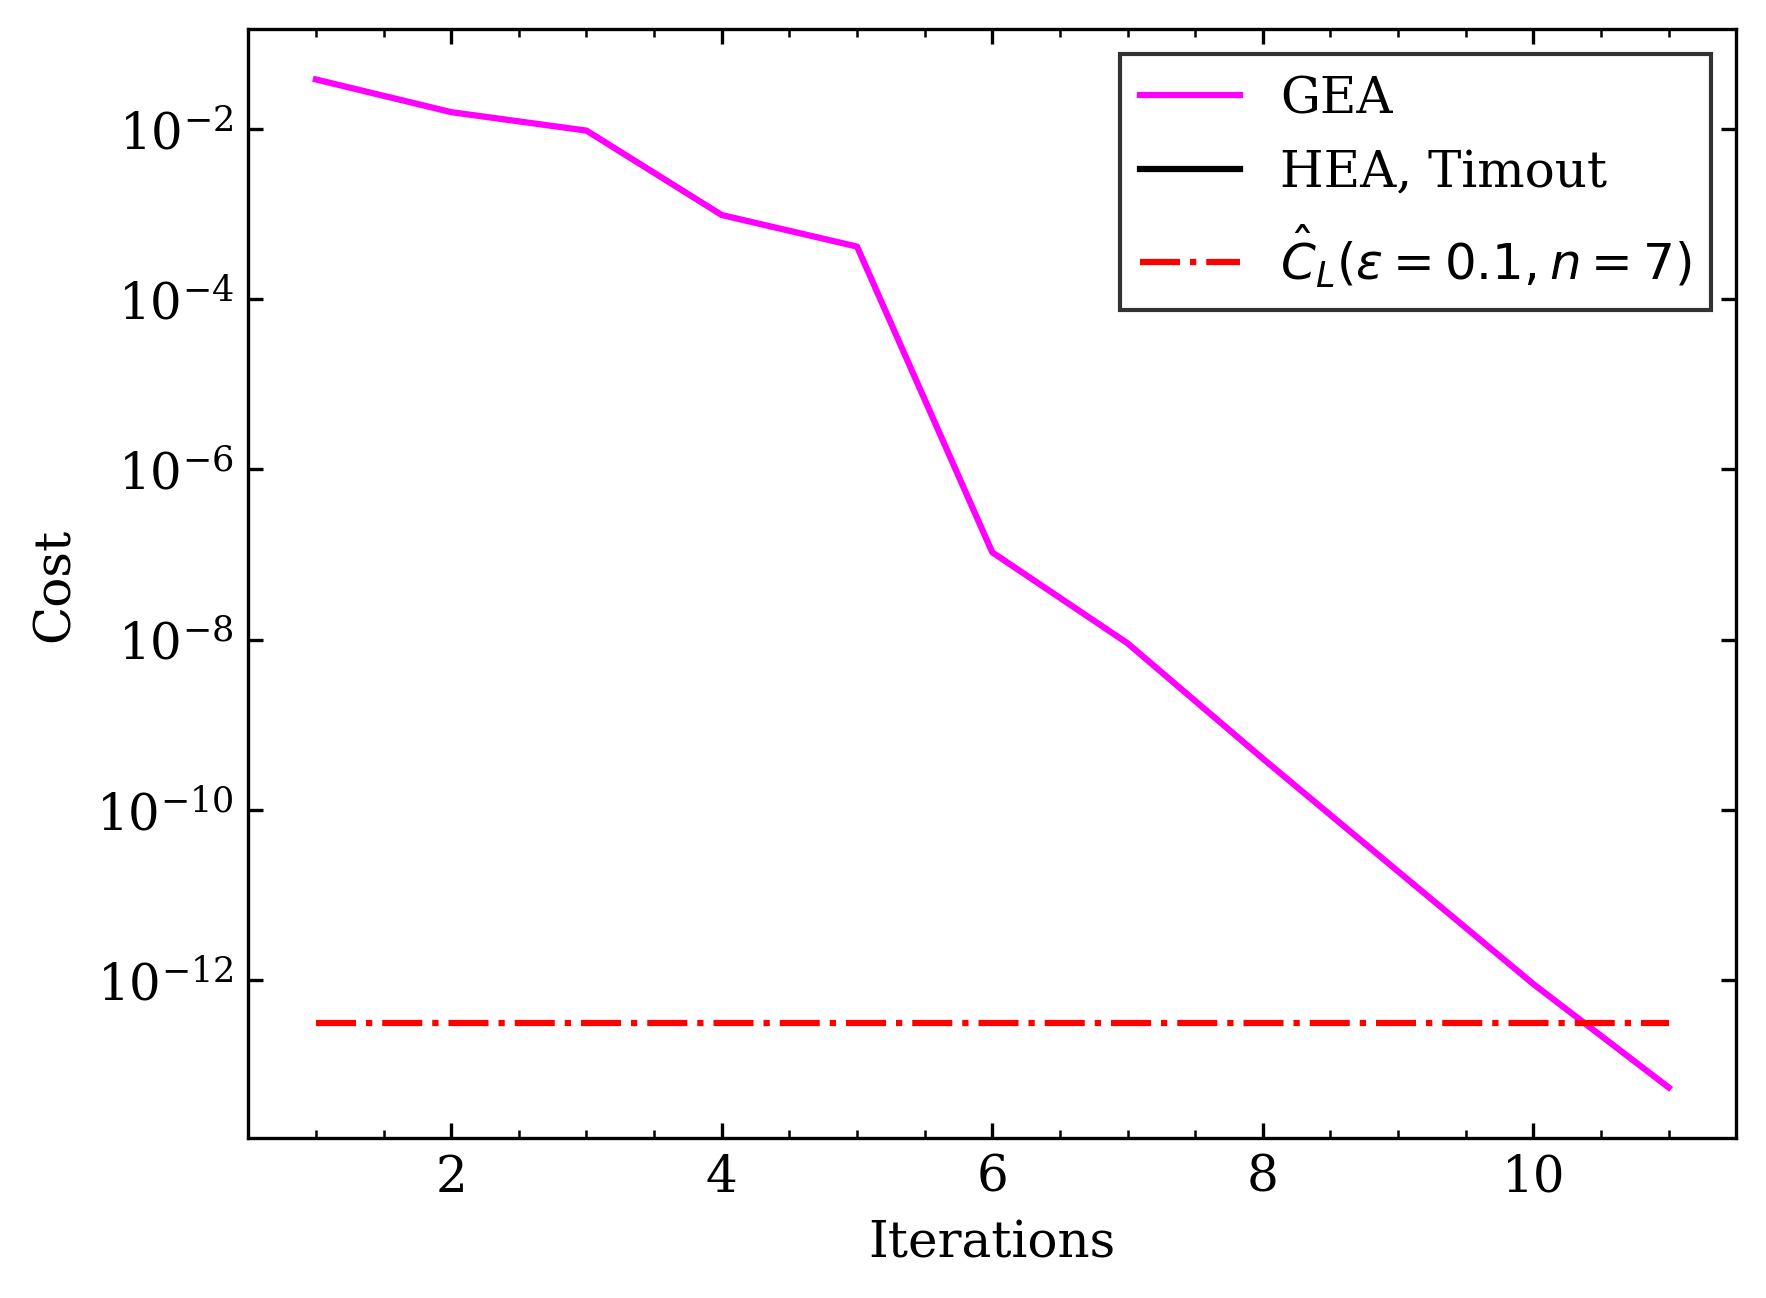

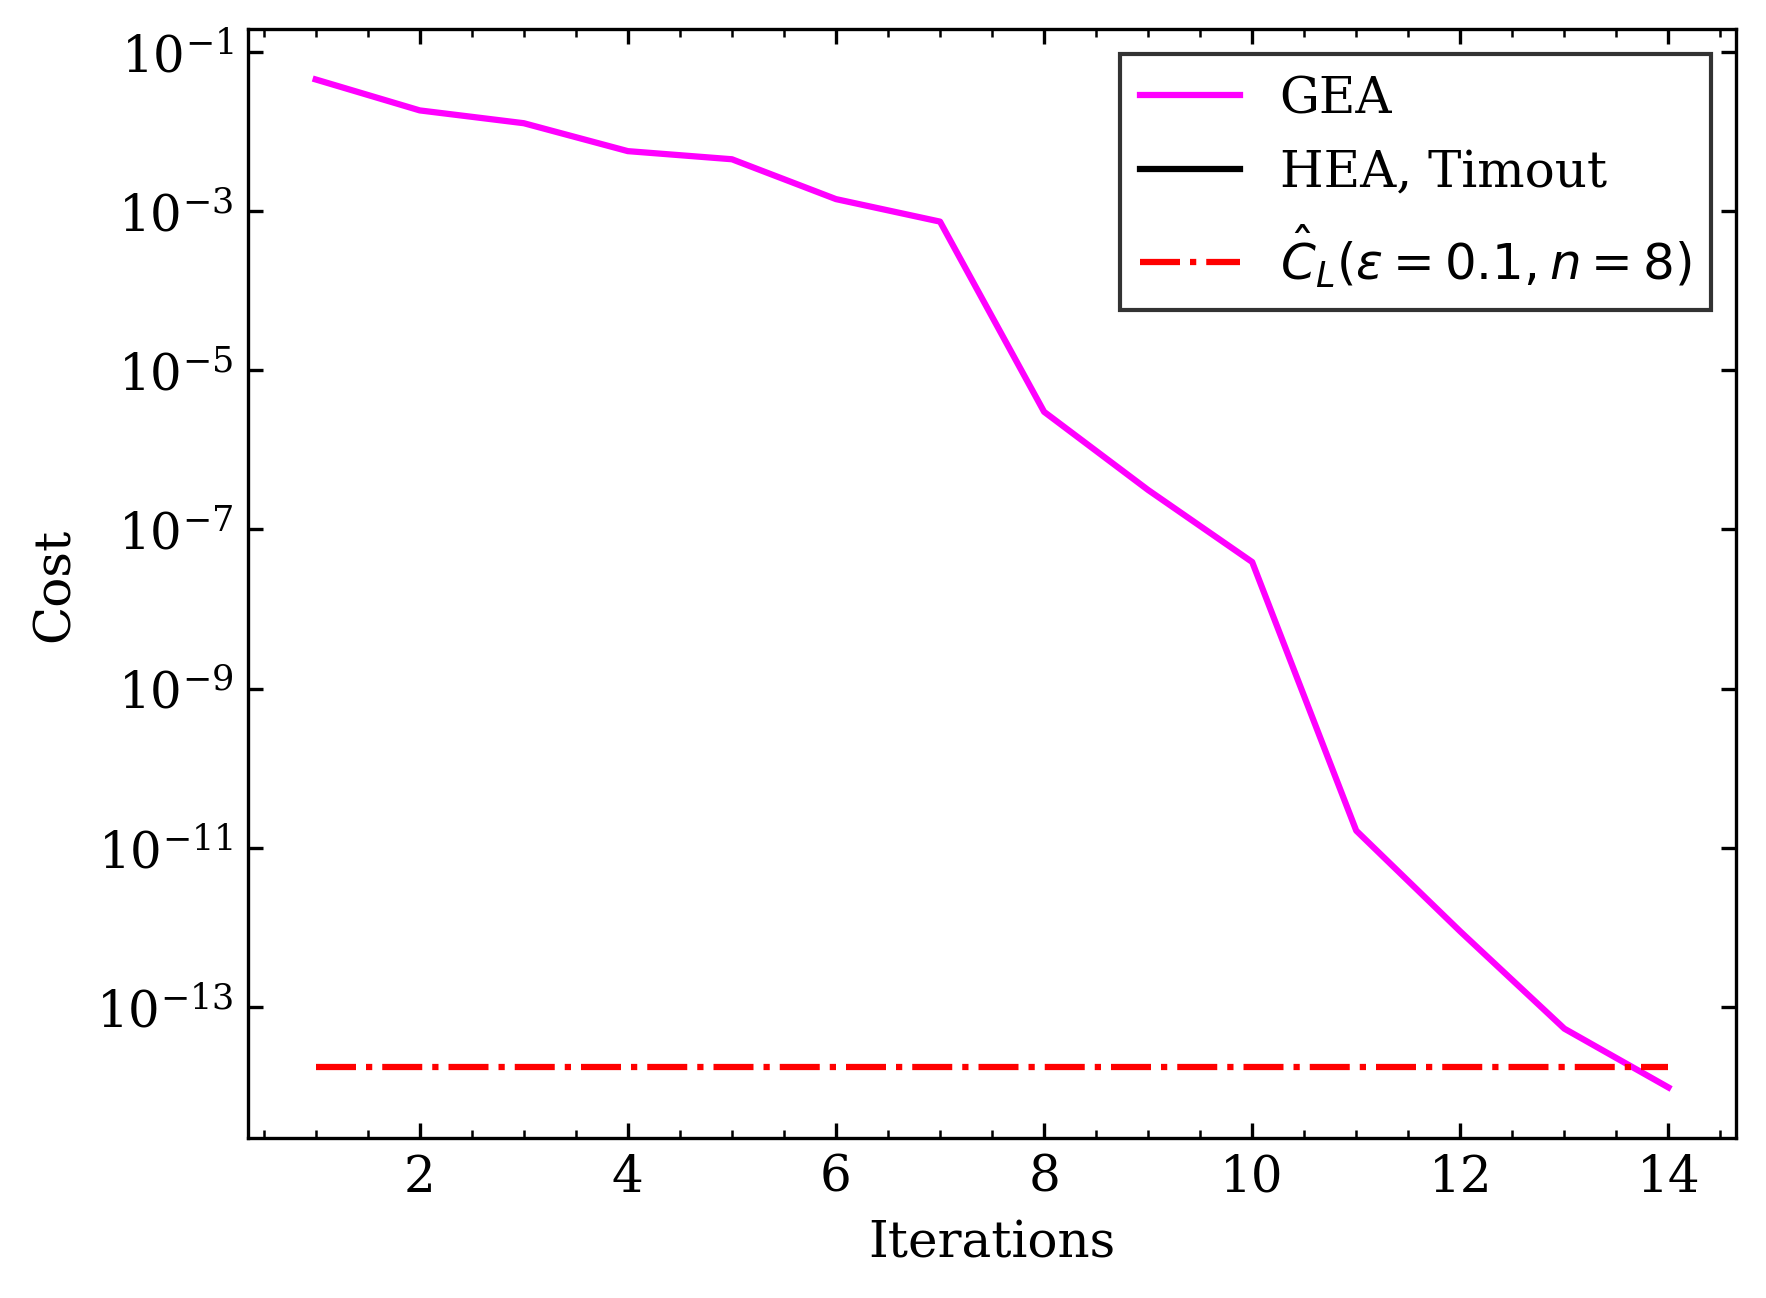

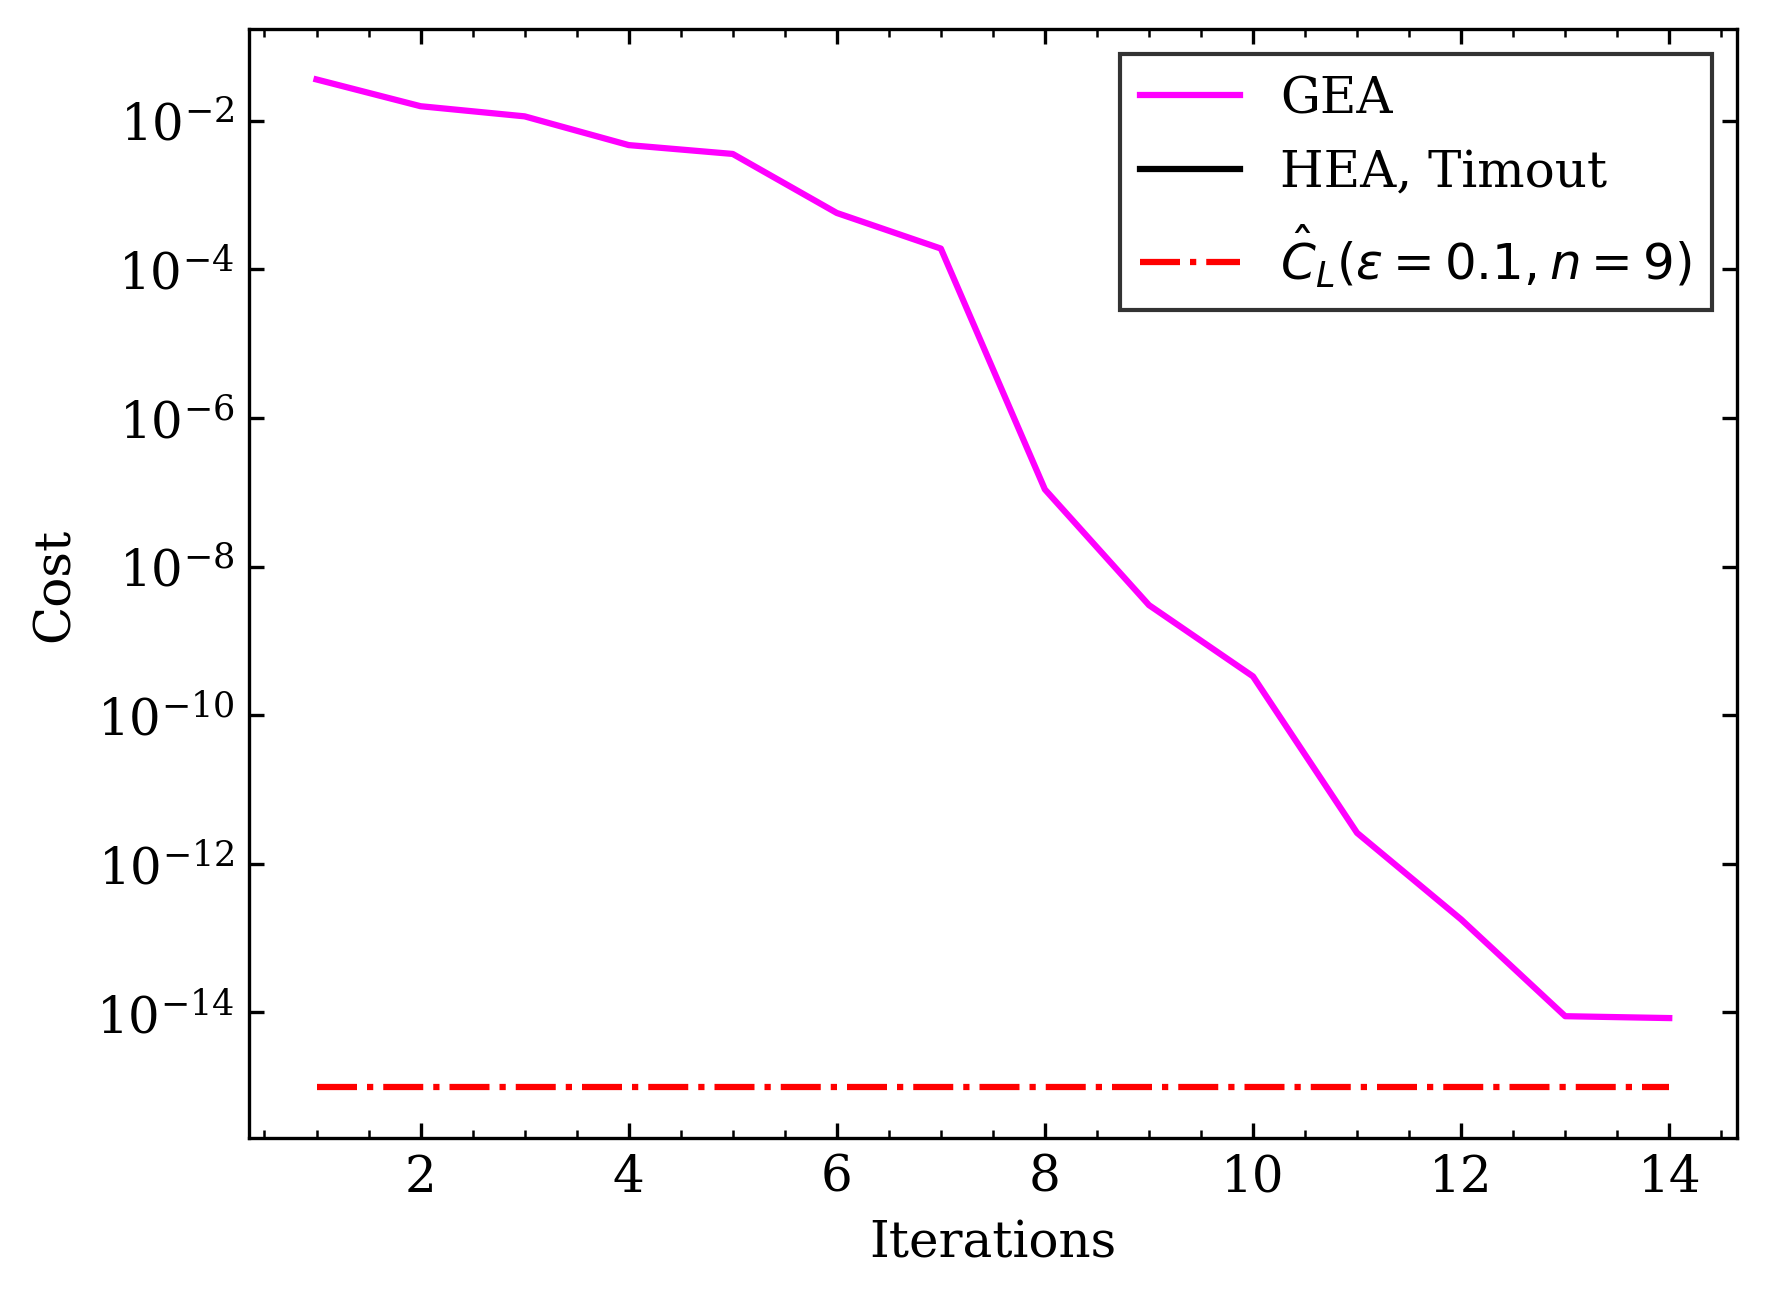

In [199]:
# Cost vs. Iterations, 3-9 QUBITS, q_delta = 0.1

vals_gea = [31, 38, 32, 32, 32, 35, 35]
vals_hea = [31, 44, 0, 0, 0, 0, 0]

for i in range(len(vals_gea)):
    gamma = file.iloc[1+i, 1]

    # GEA
    yg = list(file.iloc[21:vals_gea[i], i])
    plt.figure()
    plt.semilogy([x+1 for x in range(len(yg))], yg, "-", color=m, label=gea)

    # HEA
    if(i < 3):
        yh = list(file.iloc[21:vals_hea[i], 9+i])
        plt.semilogy([x+1 for x in range(len(yh))], yh, "-", color=b, label=ta)
    else:
        yh = []
        plt.semilogy([x+1 for x in range(len(yh))], yh, "-", color=b, label=(ta + ", Timout"))

    

    plt.semilogy([x+1 for x in range(max(len(yg),len(yh)))], [gamma for x in range(max(len(yg),len(yh)))], "-.", color="red", label="$\hat{C}_L(\epsilon=0.1, n=" + str(i+3) + ")$")
    plt.xlabel("Iterations")
    plt.ylabel("Cost")
    ticks_show()
    plt.savefig("all_images/cost_vs_qubits_0_1/cost_vs_qubits_n_" + str(i+3) + ".pdf")

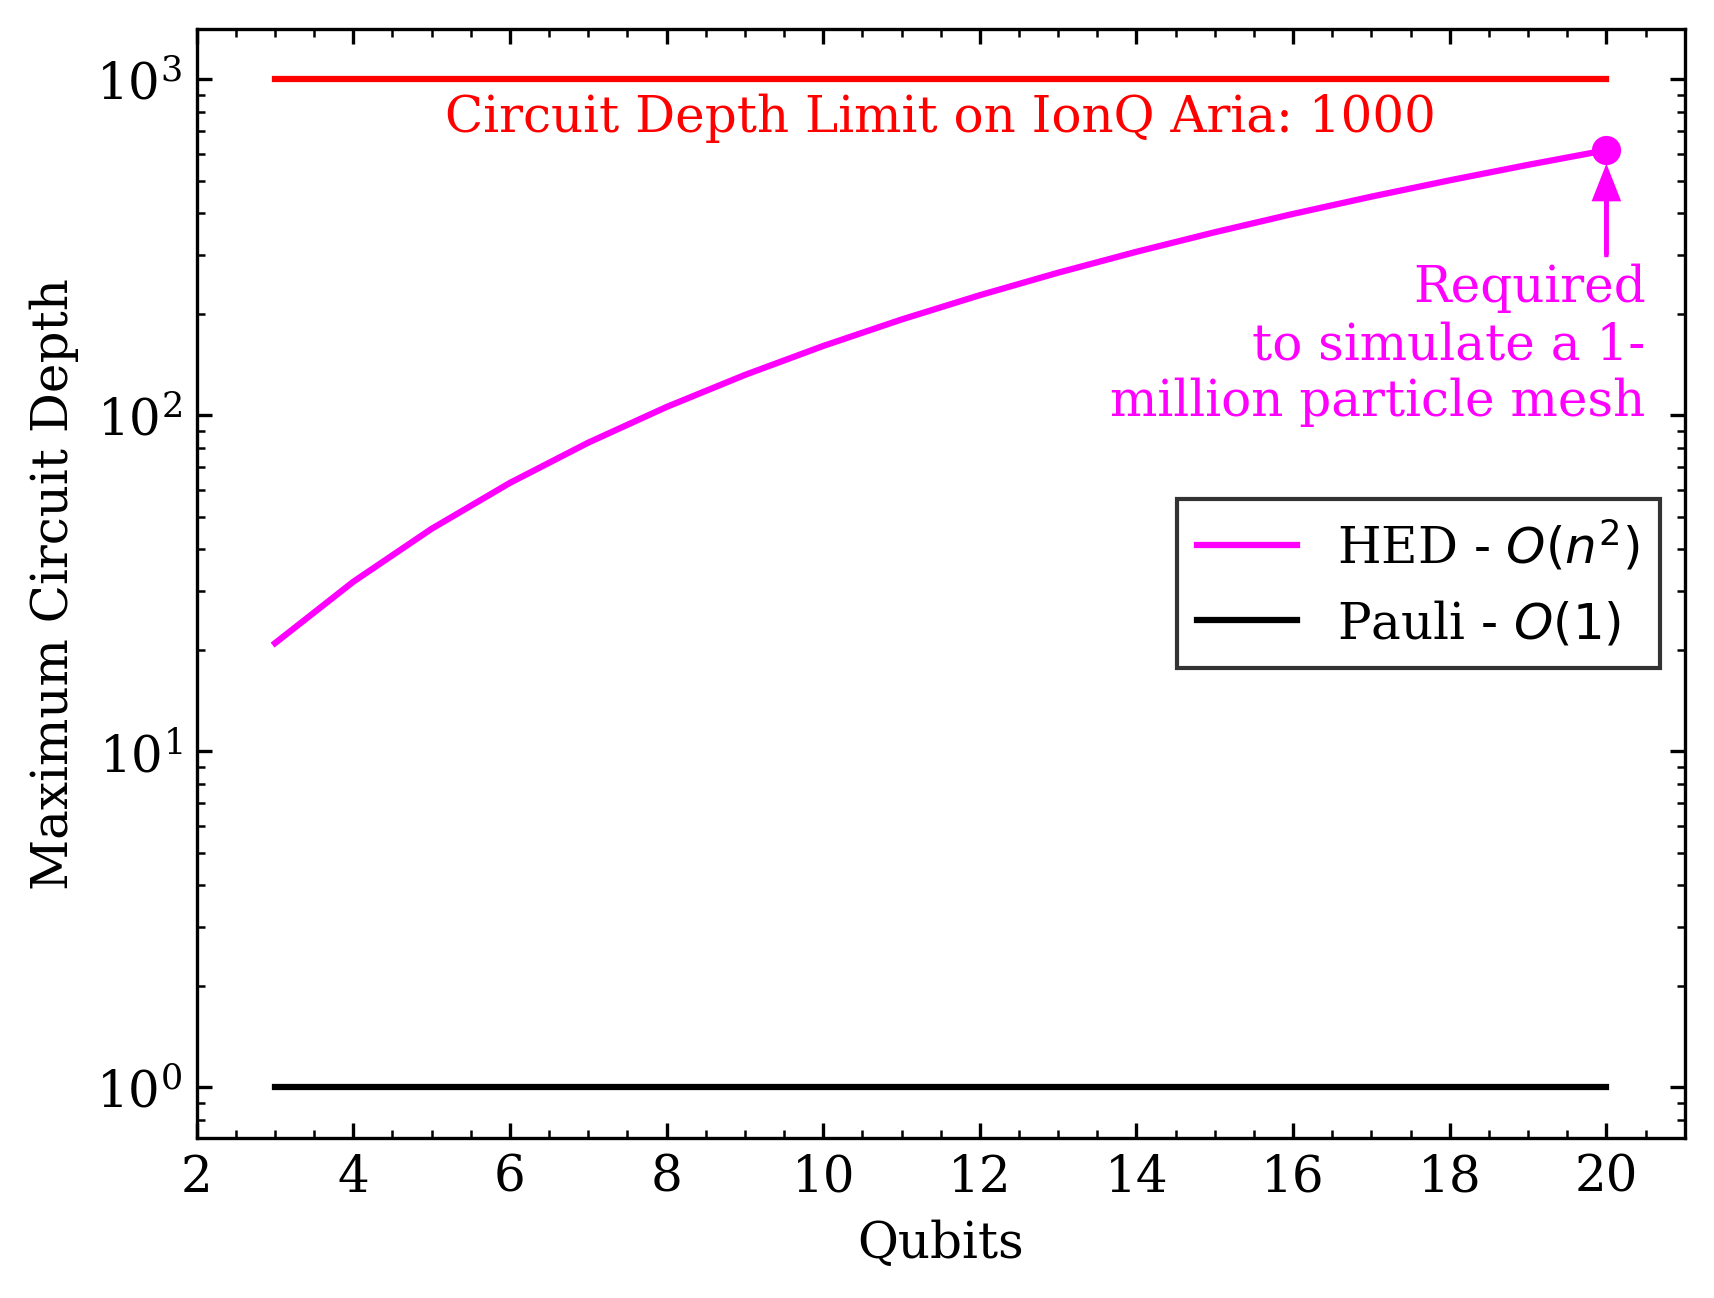

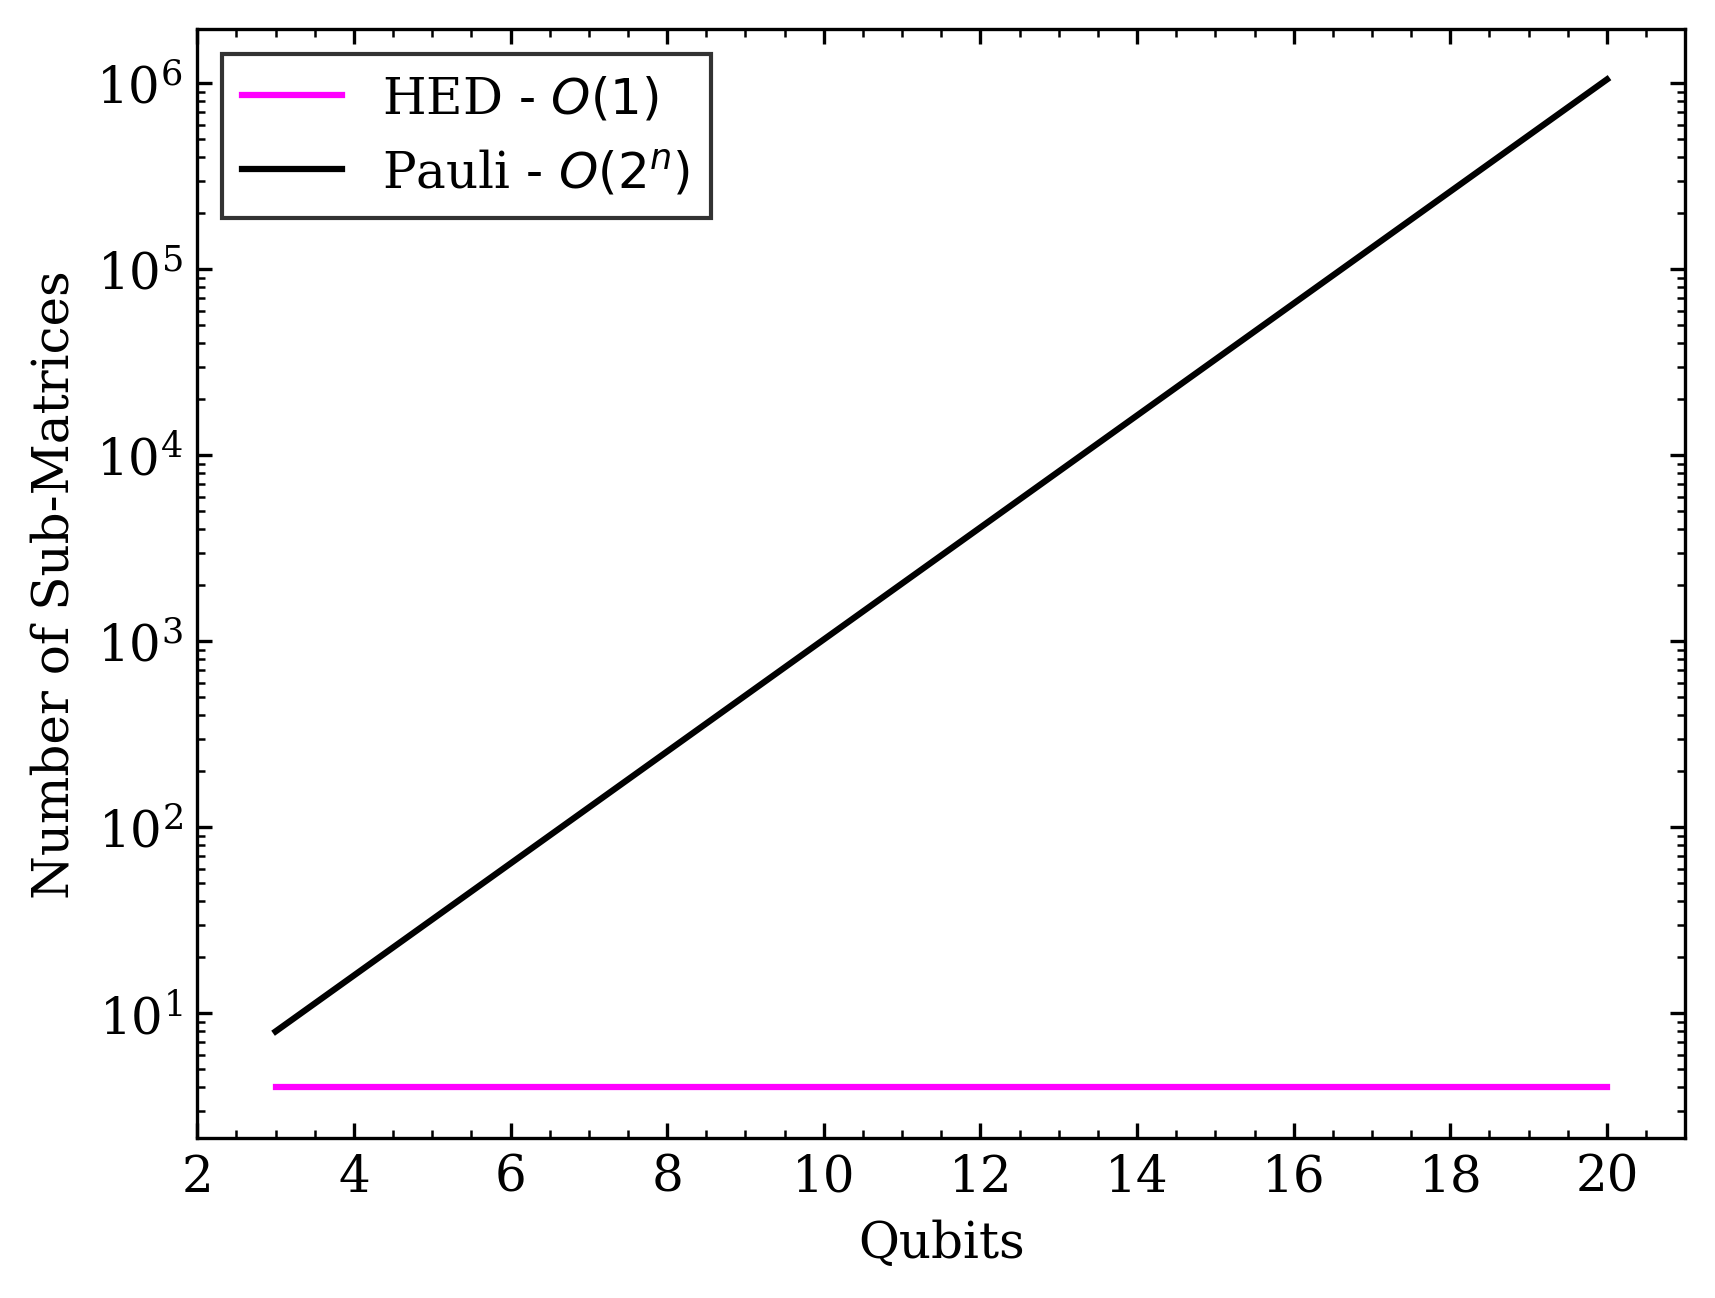

In [200]:
q_list = [x for x in range(3, 21)]

plt.figure()
plt.semilogy(q_list, [2*x + 6 + 3*((x*(x-1))/2) for x in range(3, 21)], "-", color=m, label="HED - $O(n^2)$")
plt.semilogy(q_list, [1 for x in range(3, 21)], "-", color=b, label="Pauli - $O(1)$")
plt.semilogy(q_list, [1000 for x in q_list], color="red")
plt.semilogy([20], [2*x + 6 + 3*((x*(x-1))/2) for x in [20]], "o", color=m)
plt.text(11.5, 700, "Circuit Depth Limit on IonQ Aria: 1000", horizontalalignment='center', color="red")
plt.text(20.5, 100, "Required\nto simulate a 1-\nmillion particle mesh", horizontalalignment='right', color=m)
plt.arrow(20, 300, 0, 240, head_width=0.3, head_length=100, length_includes_head=True, color=m)
plt.xlabel("Qubits")
plt.ylabel("Maximum Circuit Depth")
plt.xticks([2*x for x in range(1, 12)])
plt.xlim([2,21])
ticks_show()
plt.savefig("all_images/HED_vs_Pauli/max_circuit_depth.pdf")

plt.figure()
plt.semilogy(q_list, [4 for x in q_list], "-", color=m, label="HED - $O(1)$")
plt.semilogy(q_list, [2**x for x in q_list], "-", color=b, label="Pauli - $O(2^n)$")
plt.xlabel("Qubits")
plt.ylabel("Number of Sub-Matrices")
plt.xticks([2*x for x in range(1, 12)])
plt.xlim([2, 21])
ticks_show()
plt.savefig("all_images/HED_vs_Pauli/qc_per_eval.pdf")